# DAAO 500 Analysis

### Gender distribution

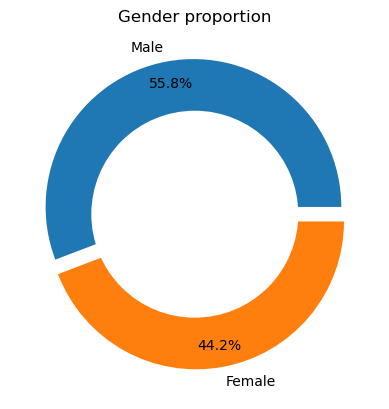

In [1]:
# for data mgmt
import json
import pandas as pd
import numpy as np
from collections import Counter
from datetime import datetime

# for plotting
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

df = pd.read_csv("data/ACDE_DAAO_Biography_Selected_v_1_1_202211101335.csv")
# get top500
df = df[df.Expert_Checked]
df.head()

# from IPython.display import Image
# Image(filename='images/DAAO500_1.png')

## Gender Proportion
df_gender=pd.DataFrame(dict(Counter(df["gender"])).items(),
                              columns=["Gender","Frequency"])

# explosion
explode = (0.05, 0.05)
  
# Pie Chart
plt.pie(df_gender['Frequency'], labels=['Male','Female'],
        autopct='%1.1f%%', pctdistance=0.85,
        explode=explode)
  
# draw circle
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
  
# Adding Circle in Pie chart
fig.gca().add_artist(centre_circle)
  
# Adding Title of chart
plt.title('Gender proportion')
  
# Displaying Chart
plt.show()

### Age distribution

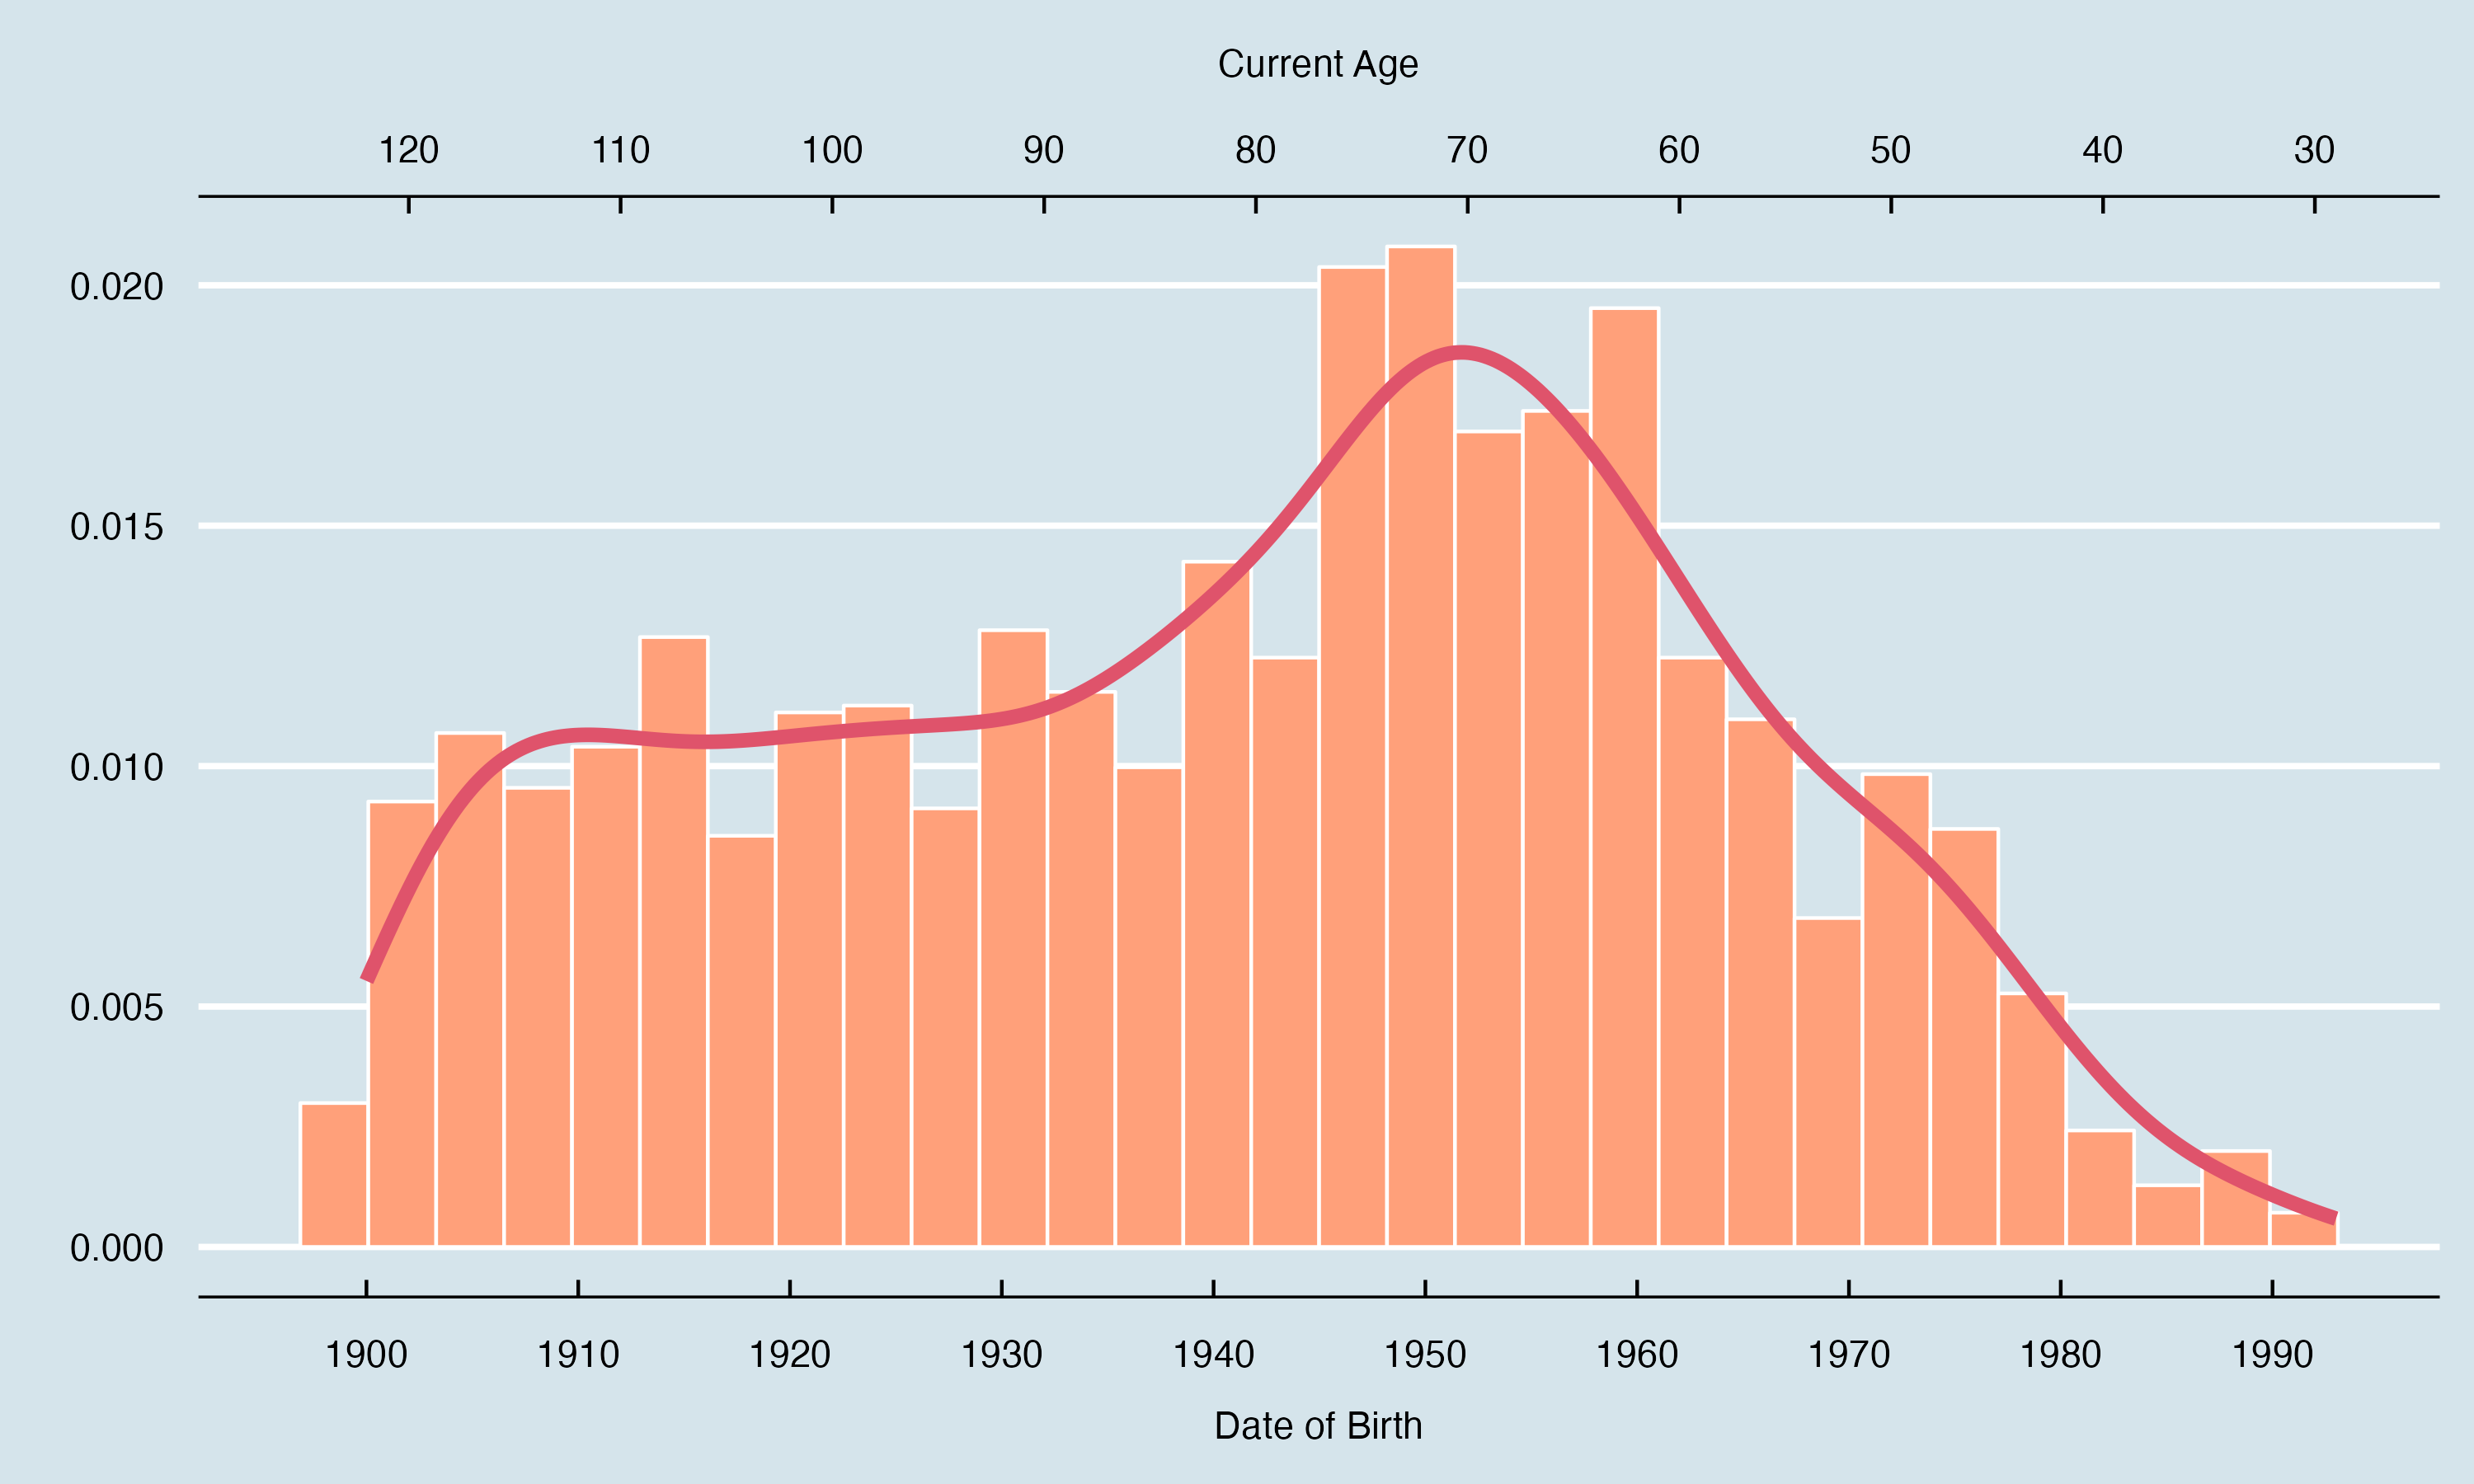

In [11]:
Image(filename='images/DAAO500_2.png')

### Age distribution by gender

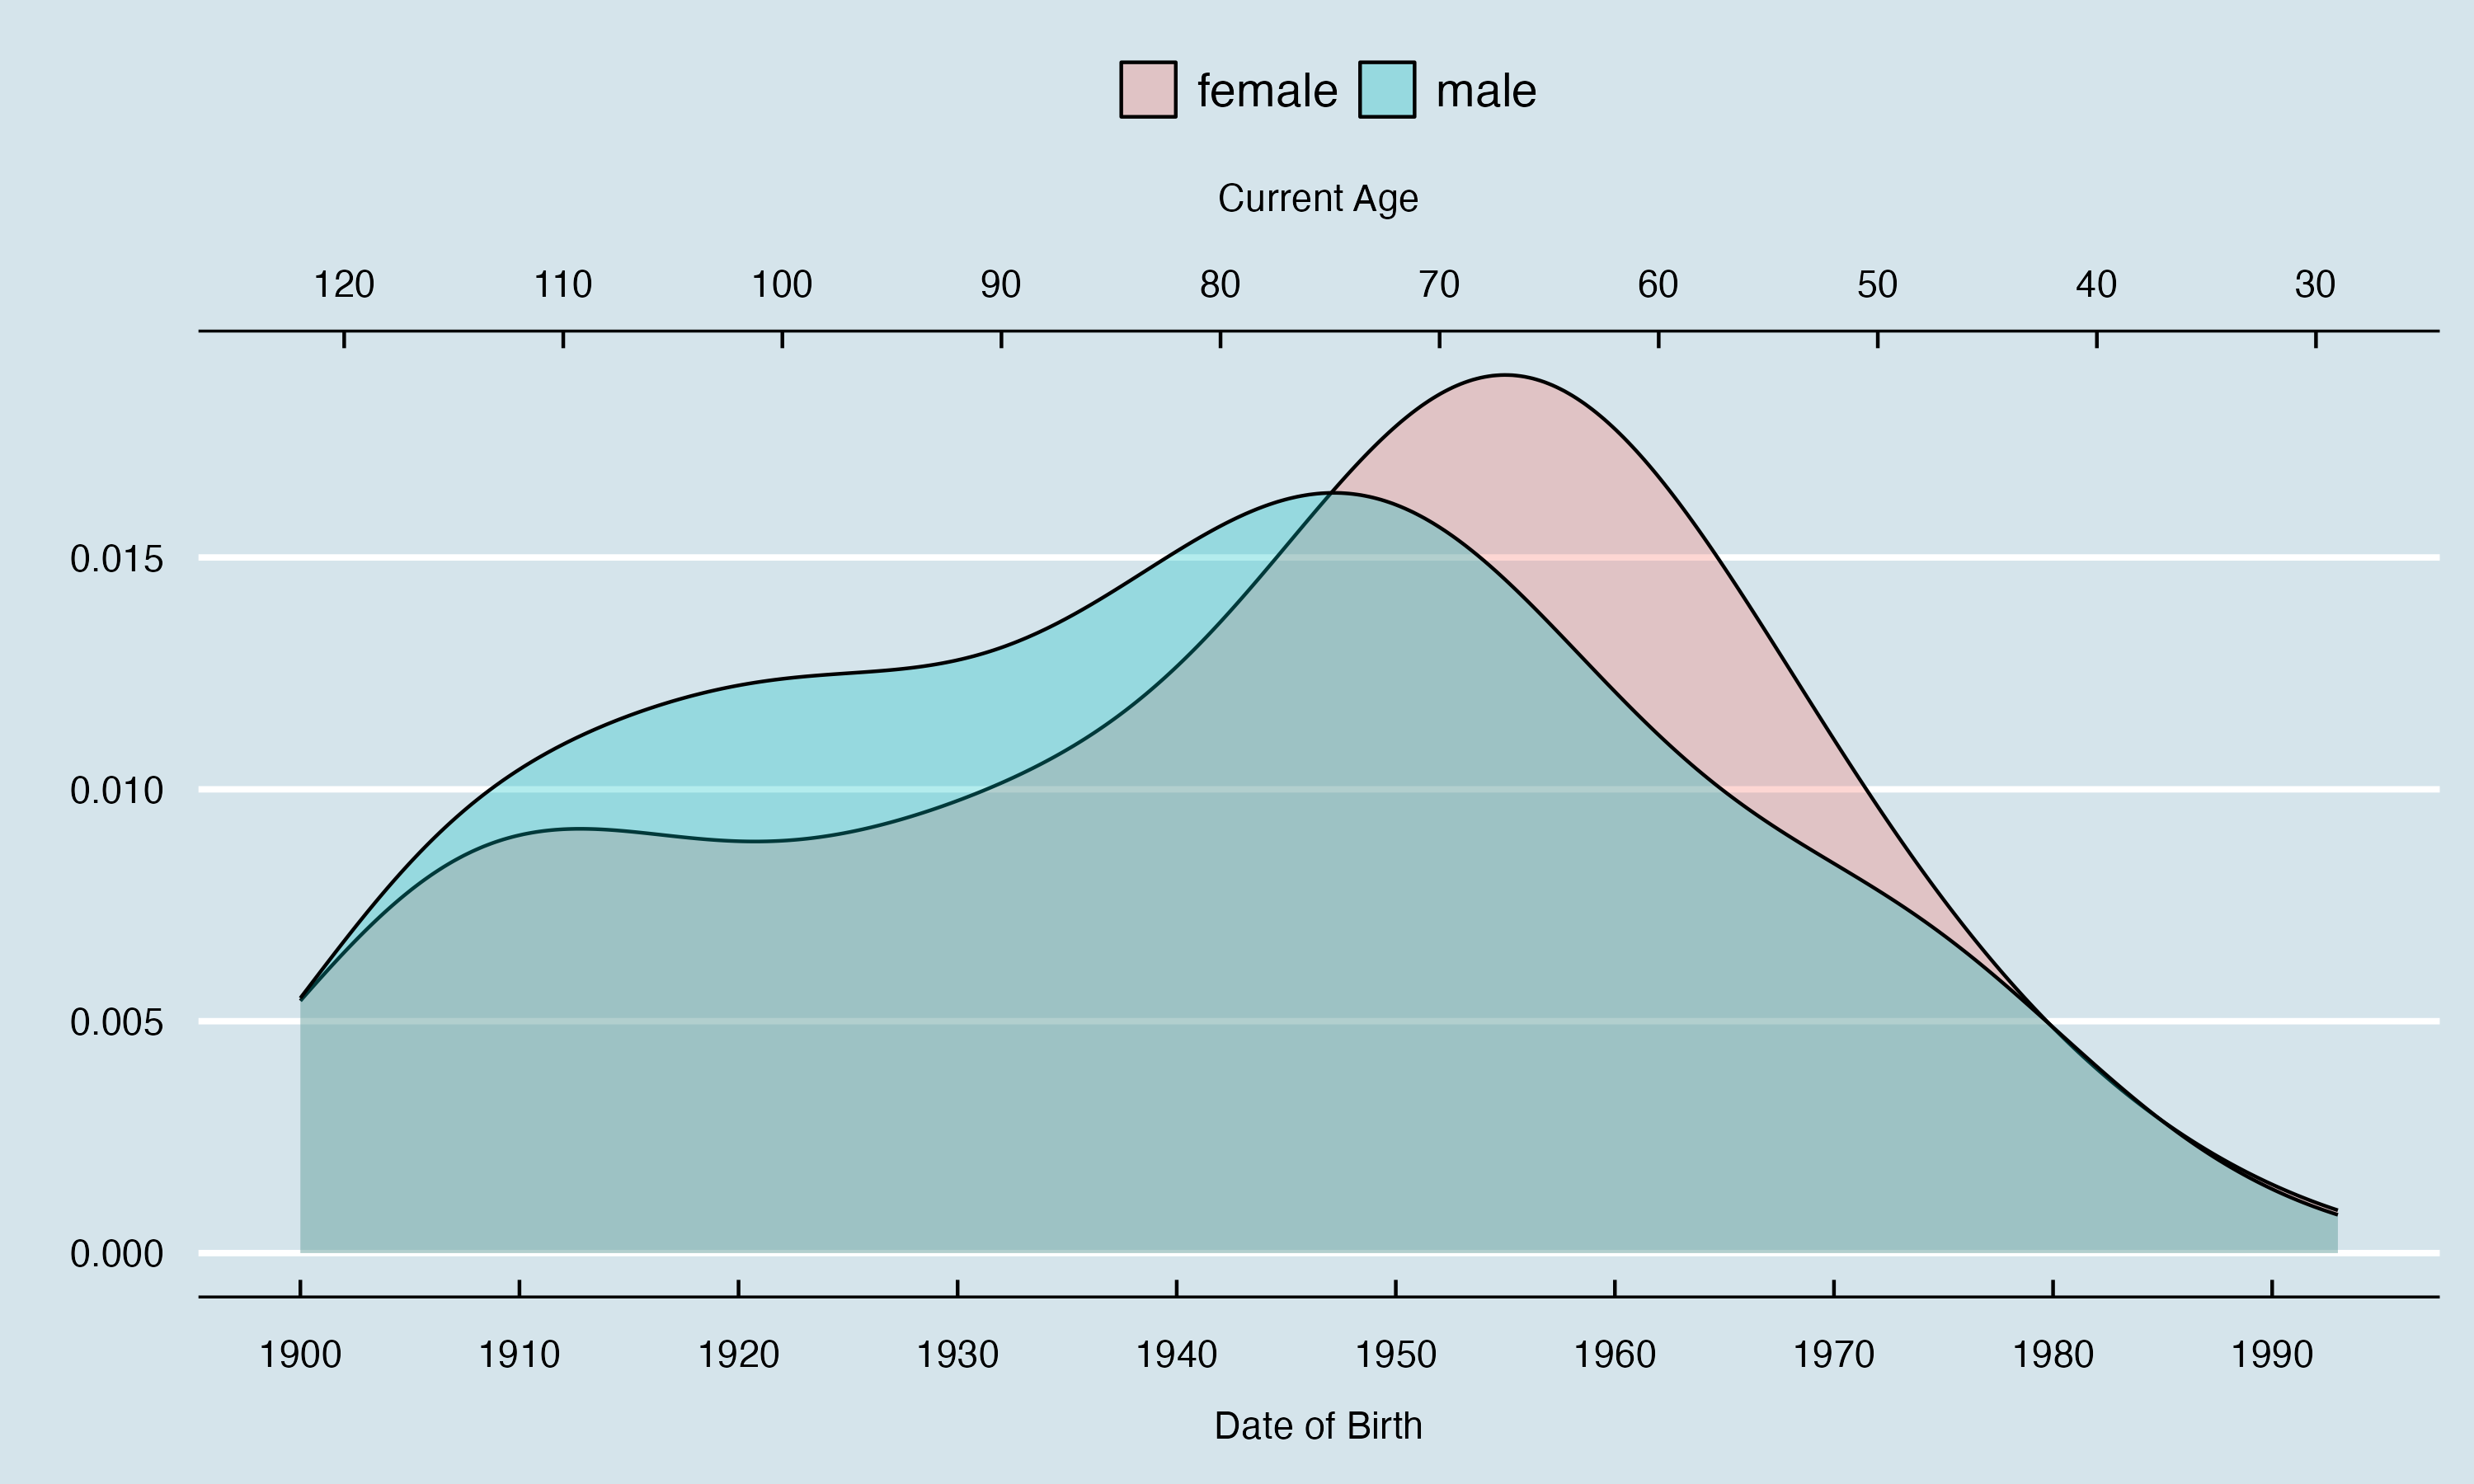

In [13]:
Image(filename='images/DAAO500_3.png')

### Lifespan distribution

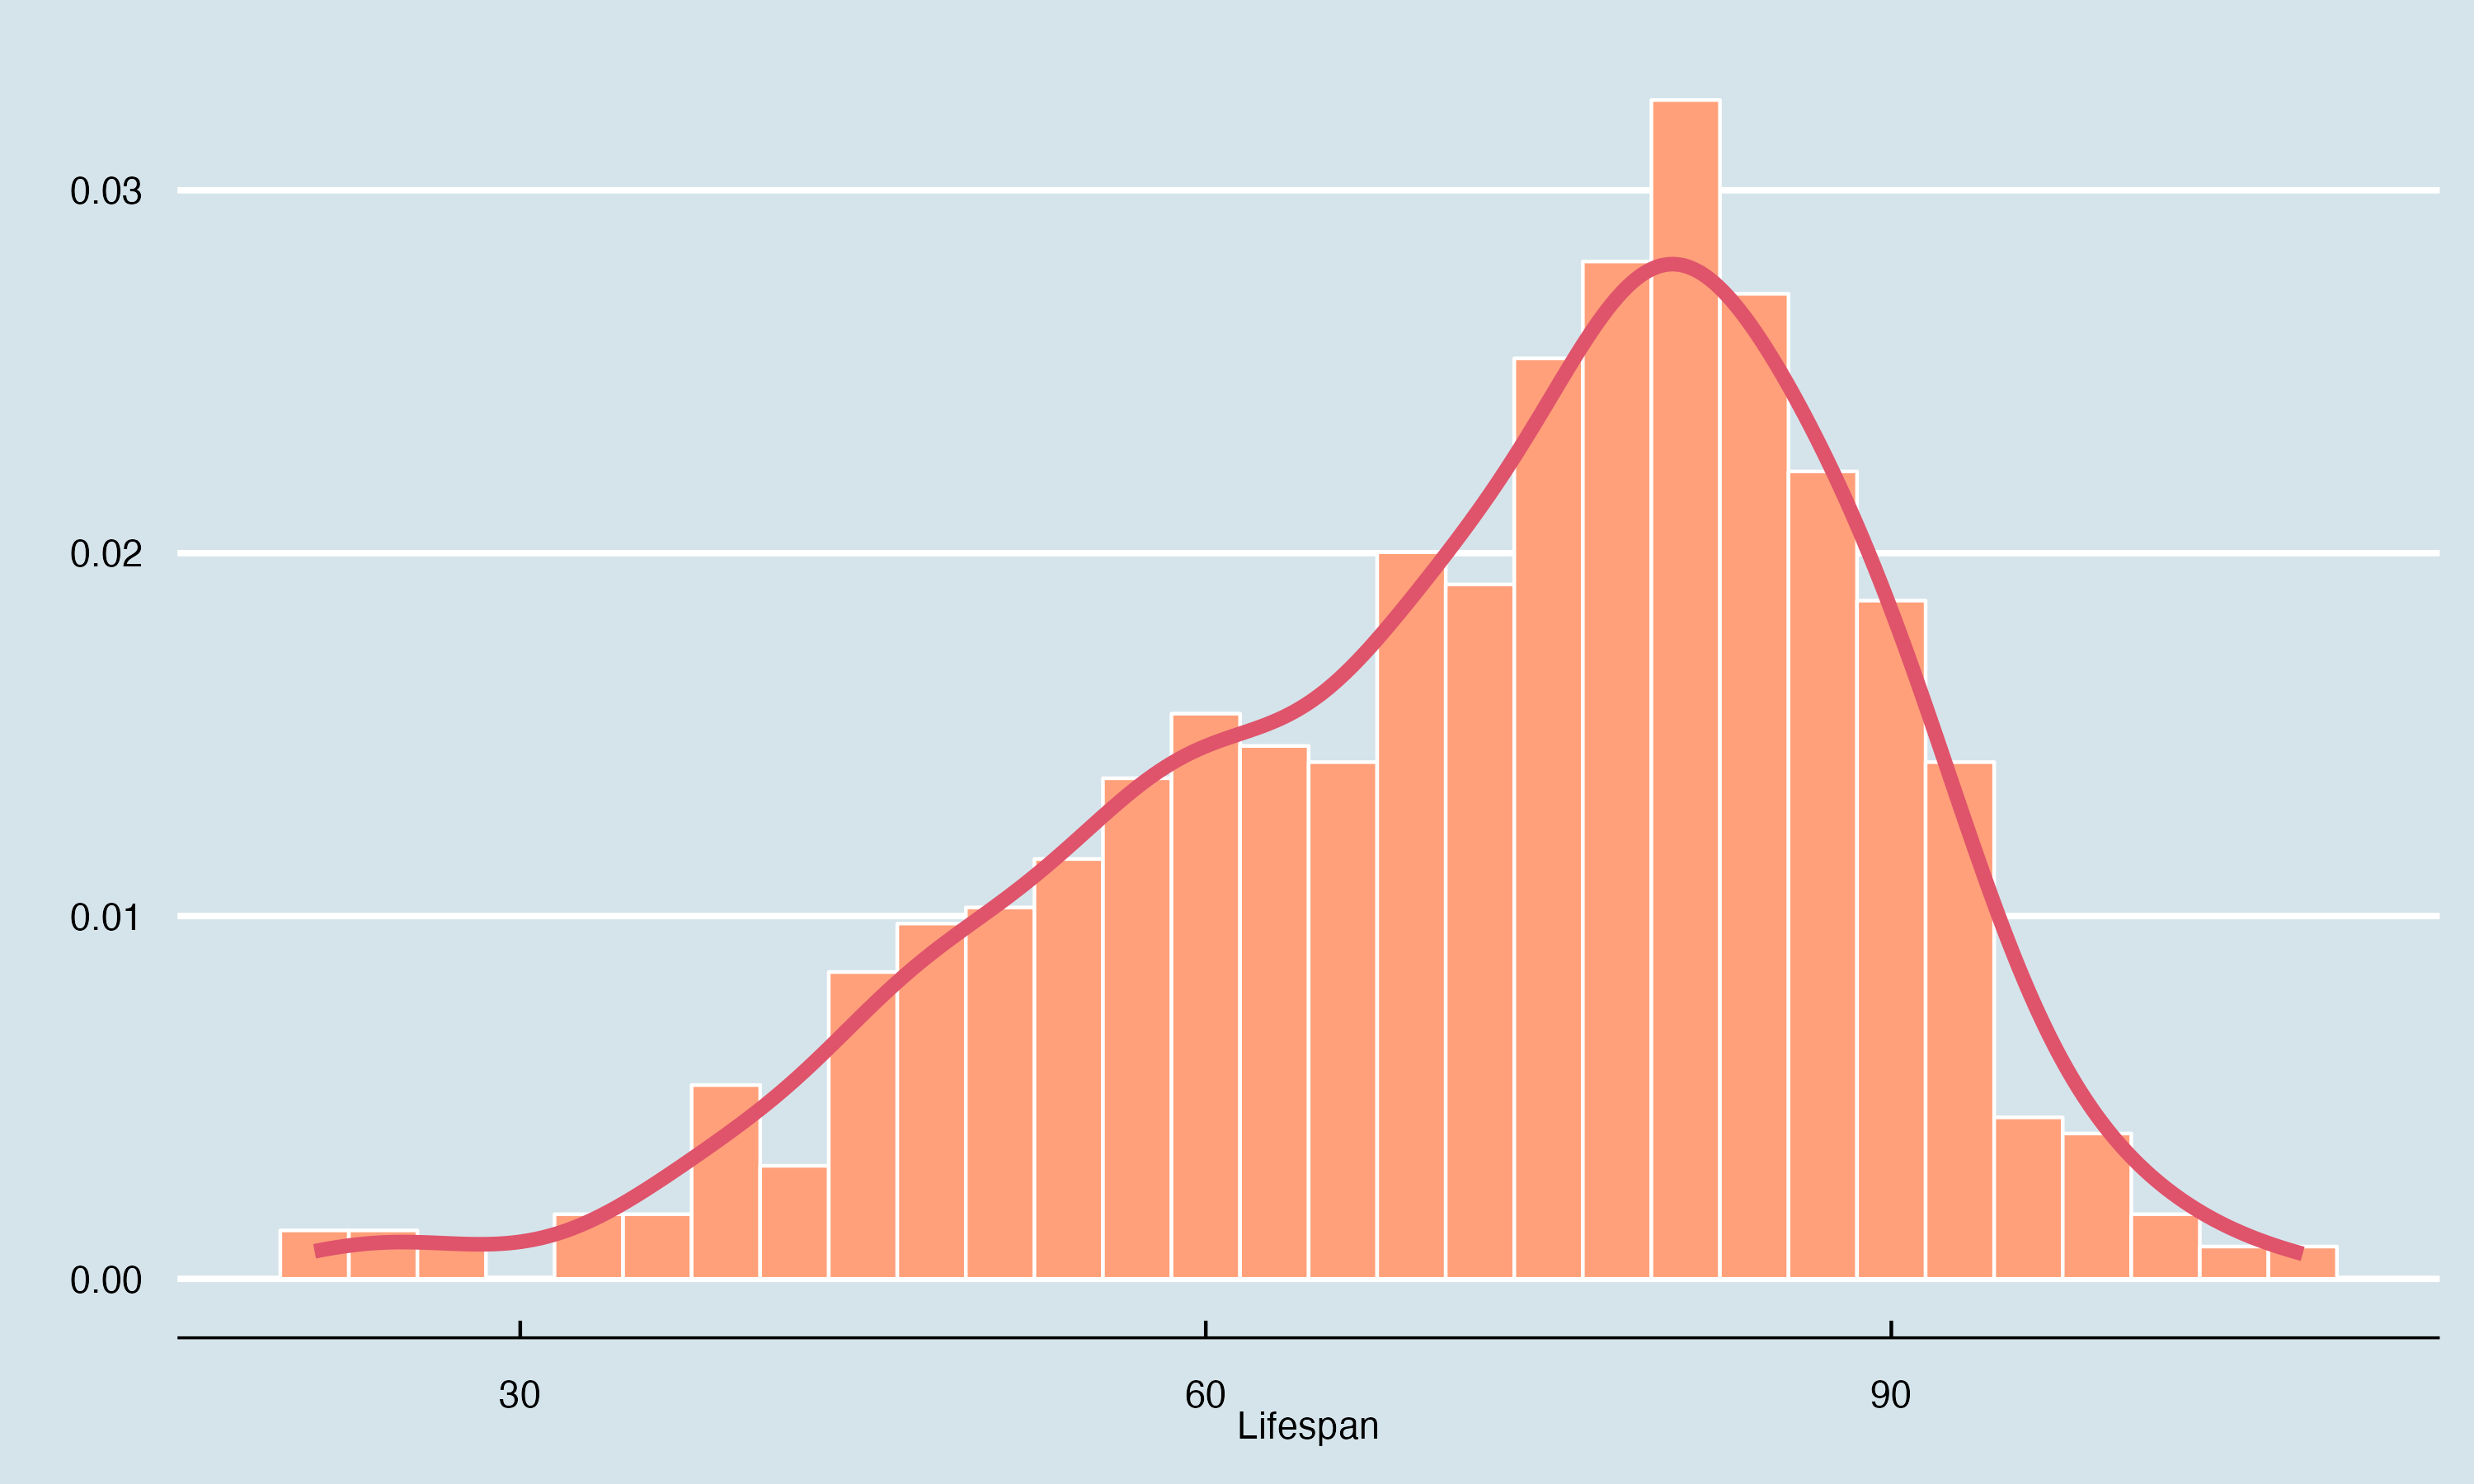

In [15]:
Image(filename='images/DAAO500_4.png')

### Lifespan distribution by gender

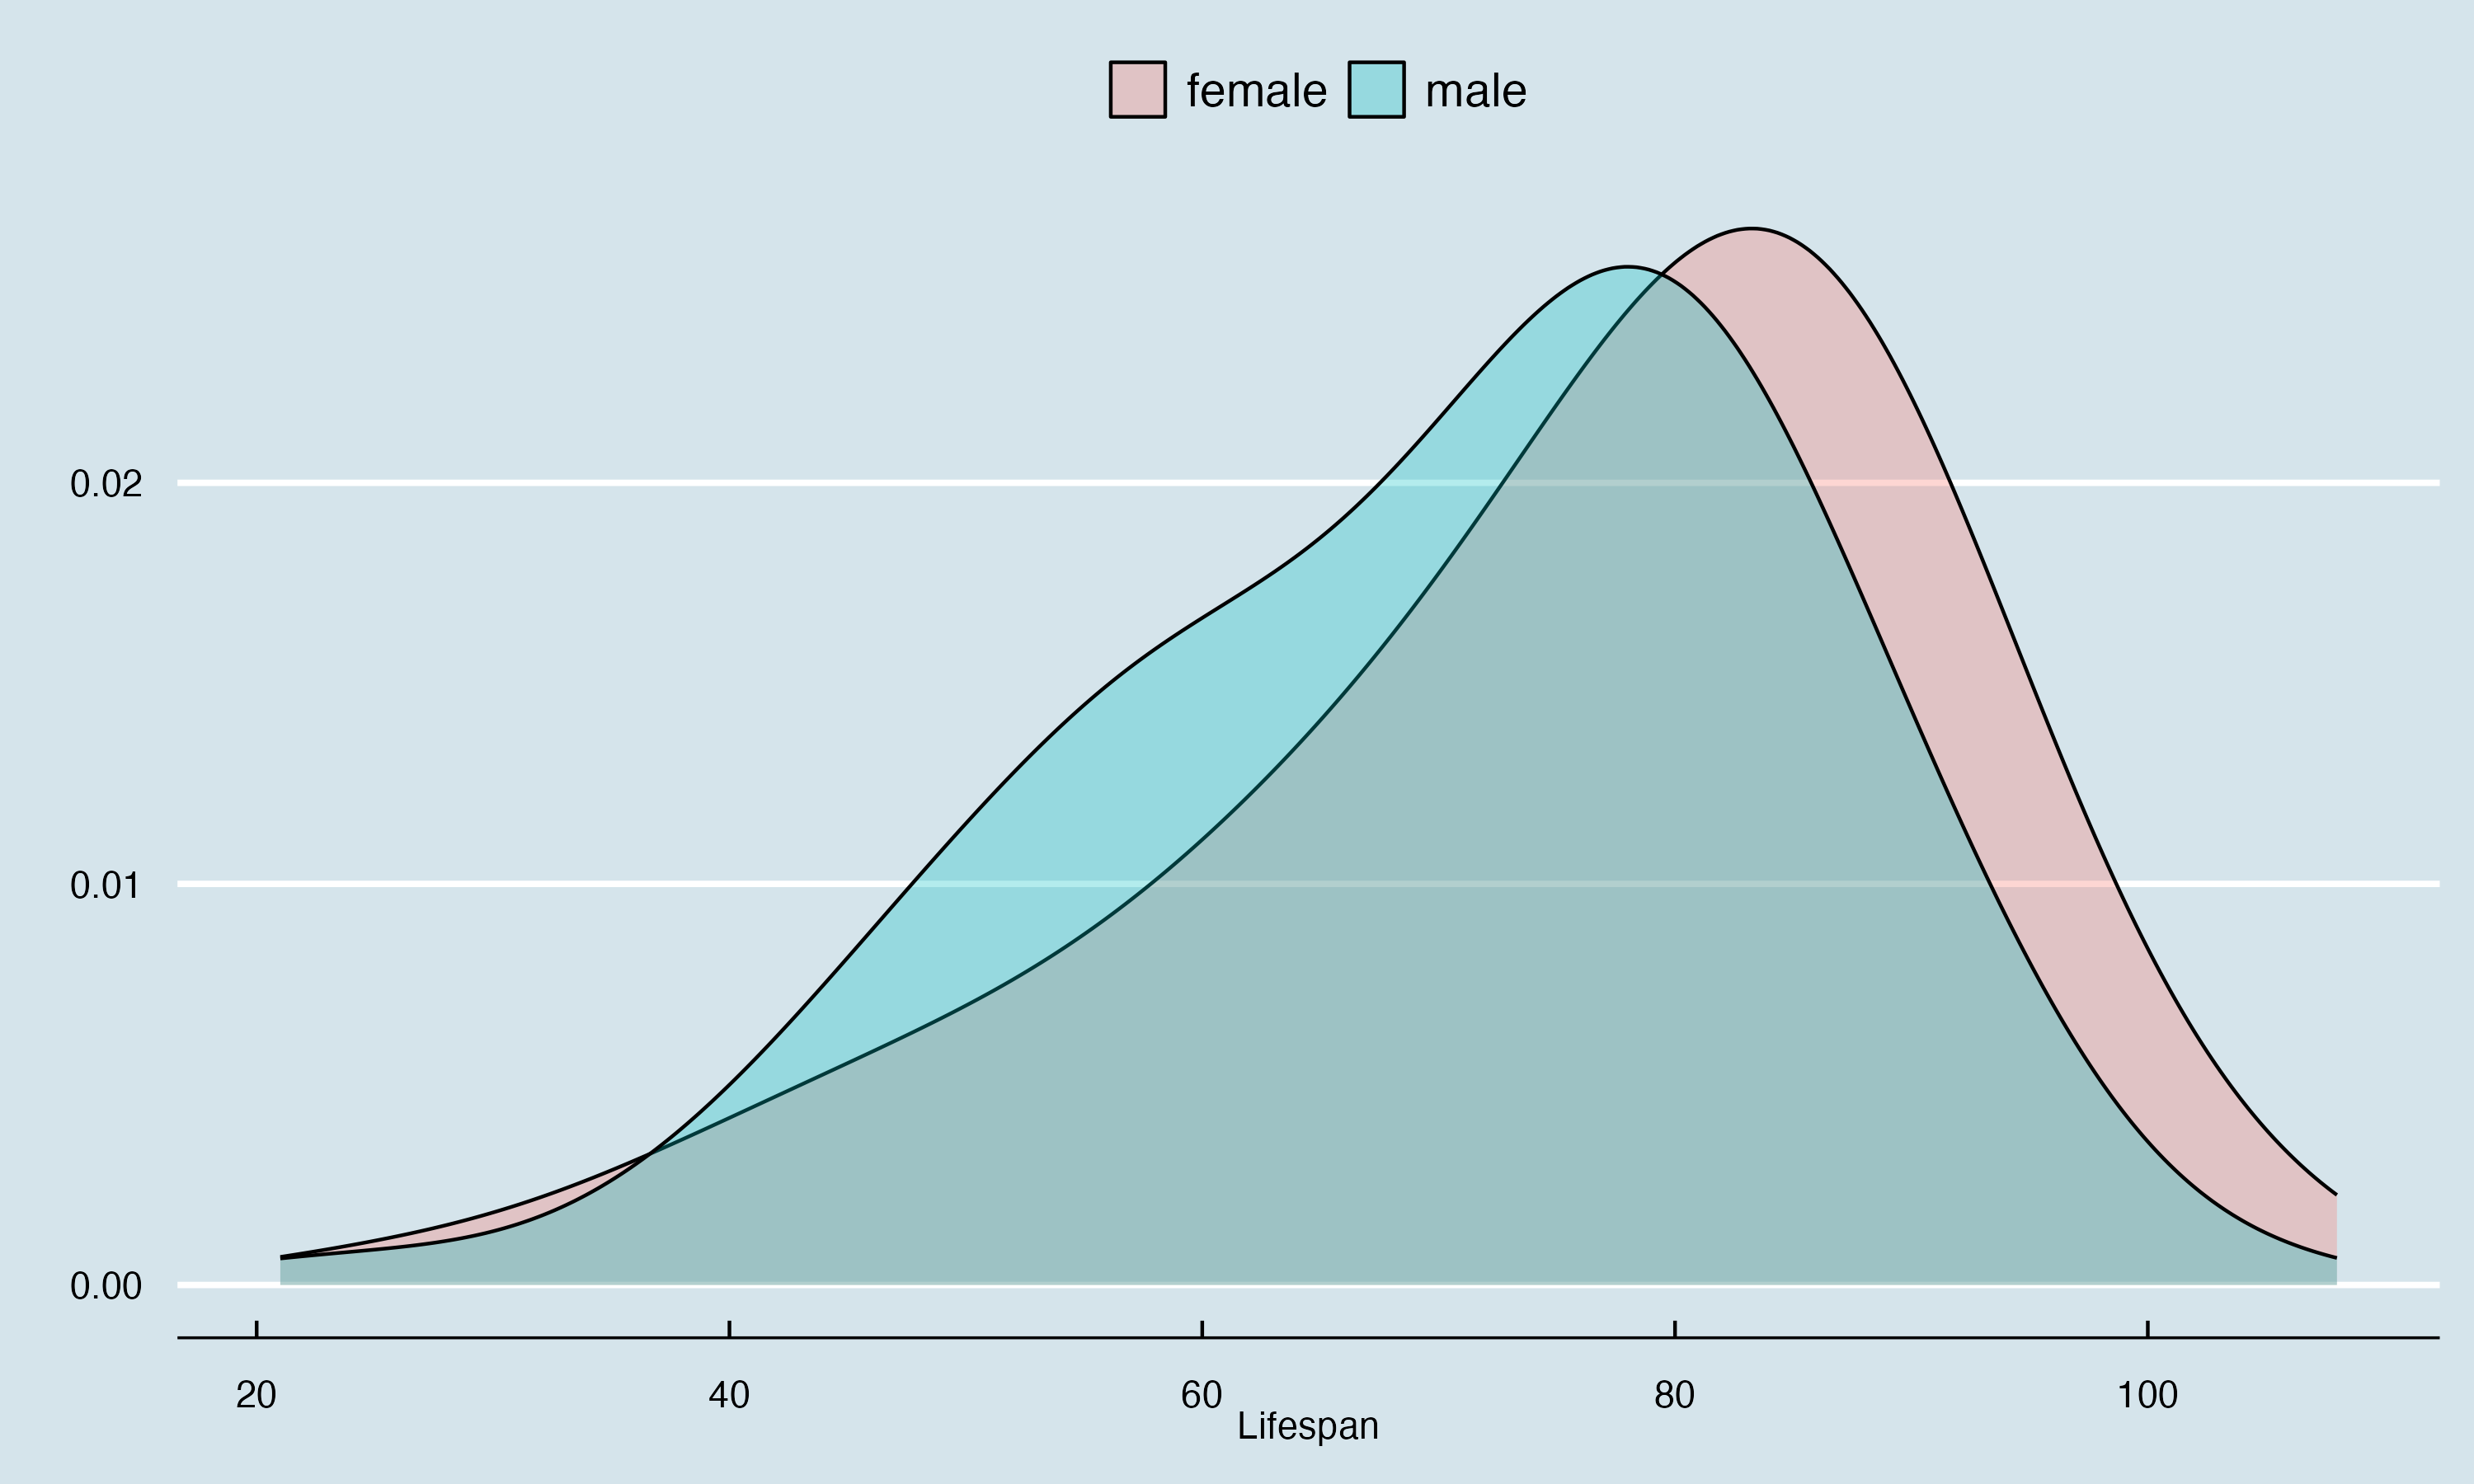

In [16]:
Image(filename='images/DAAO500_5.png')

### Birthplace

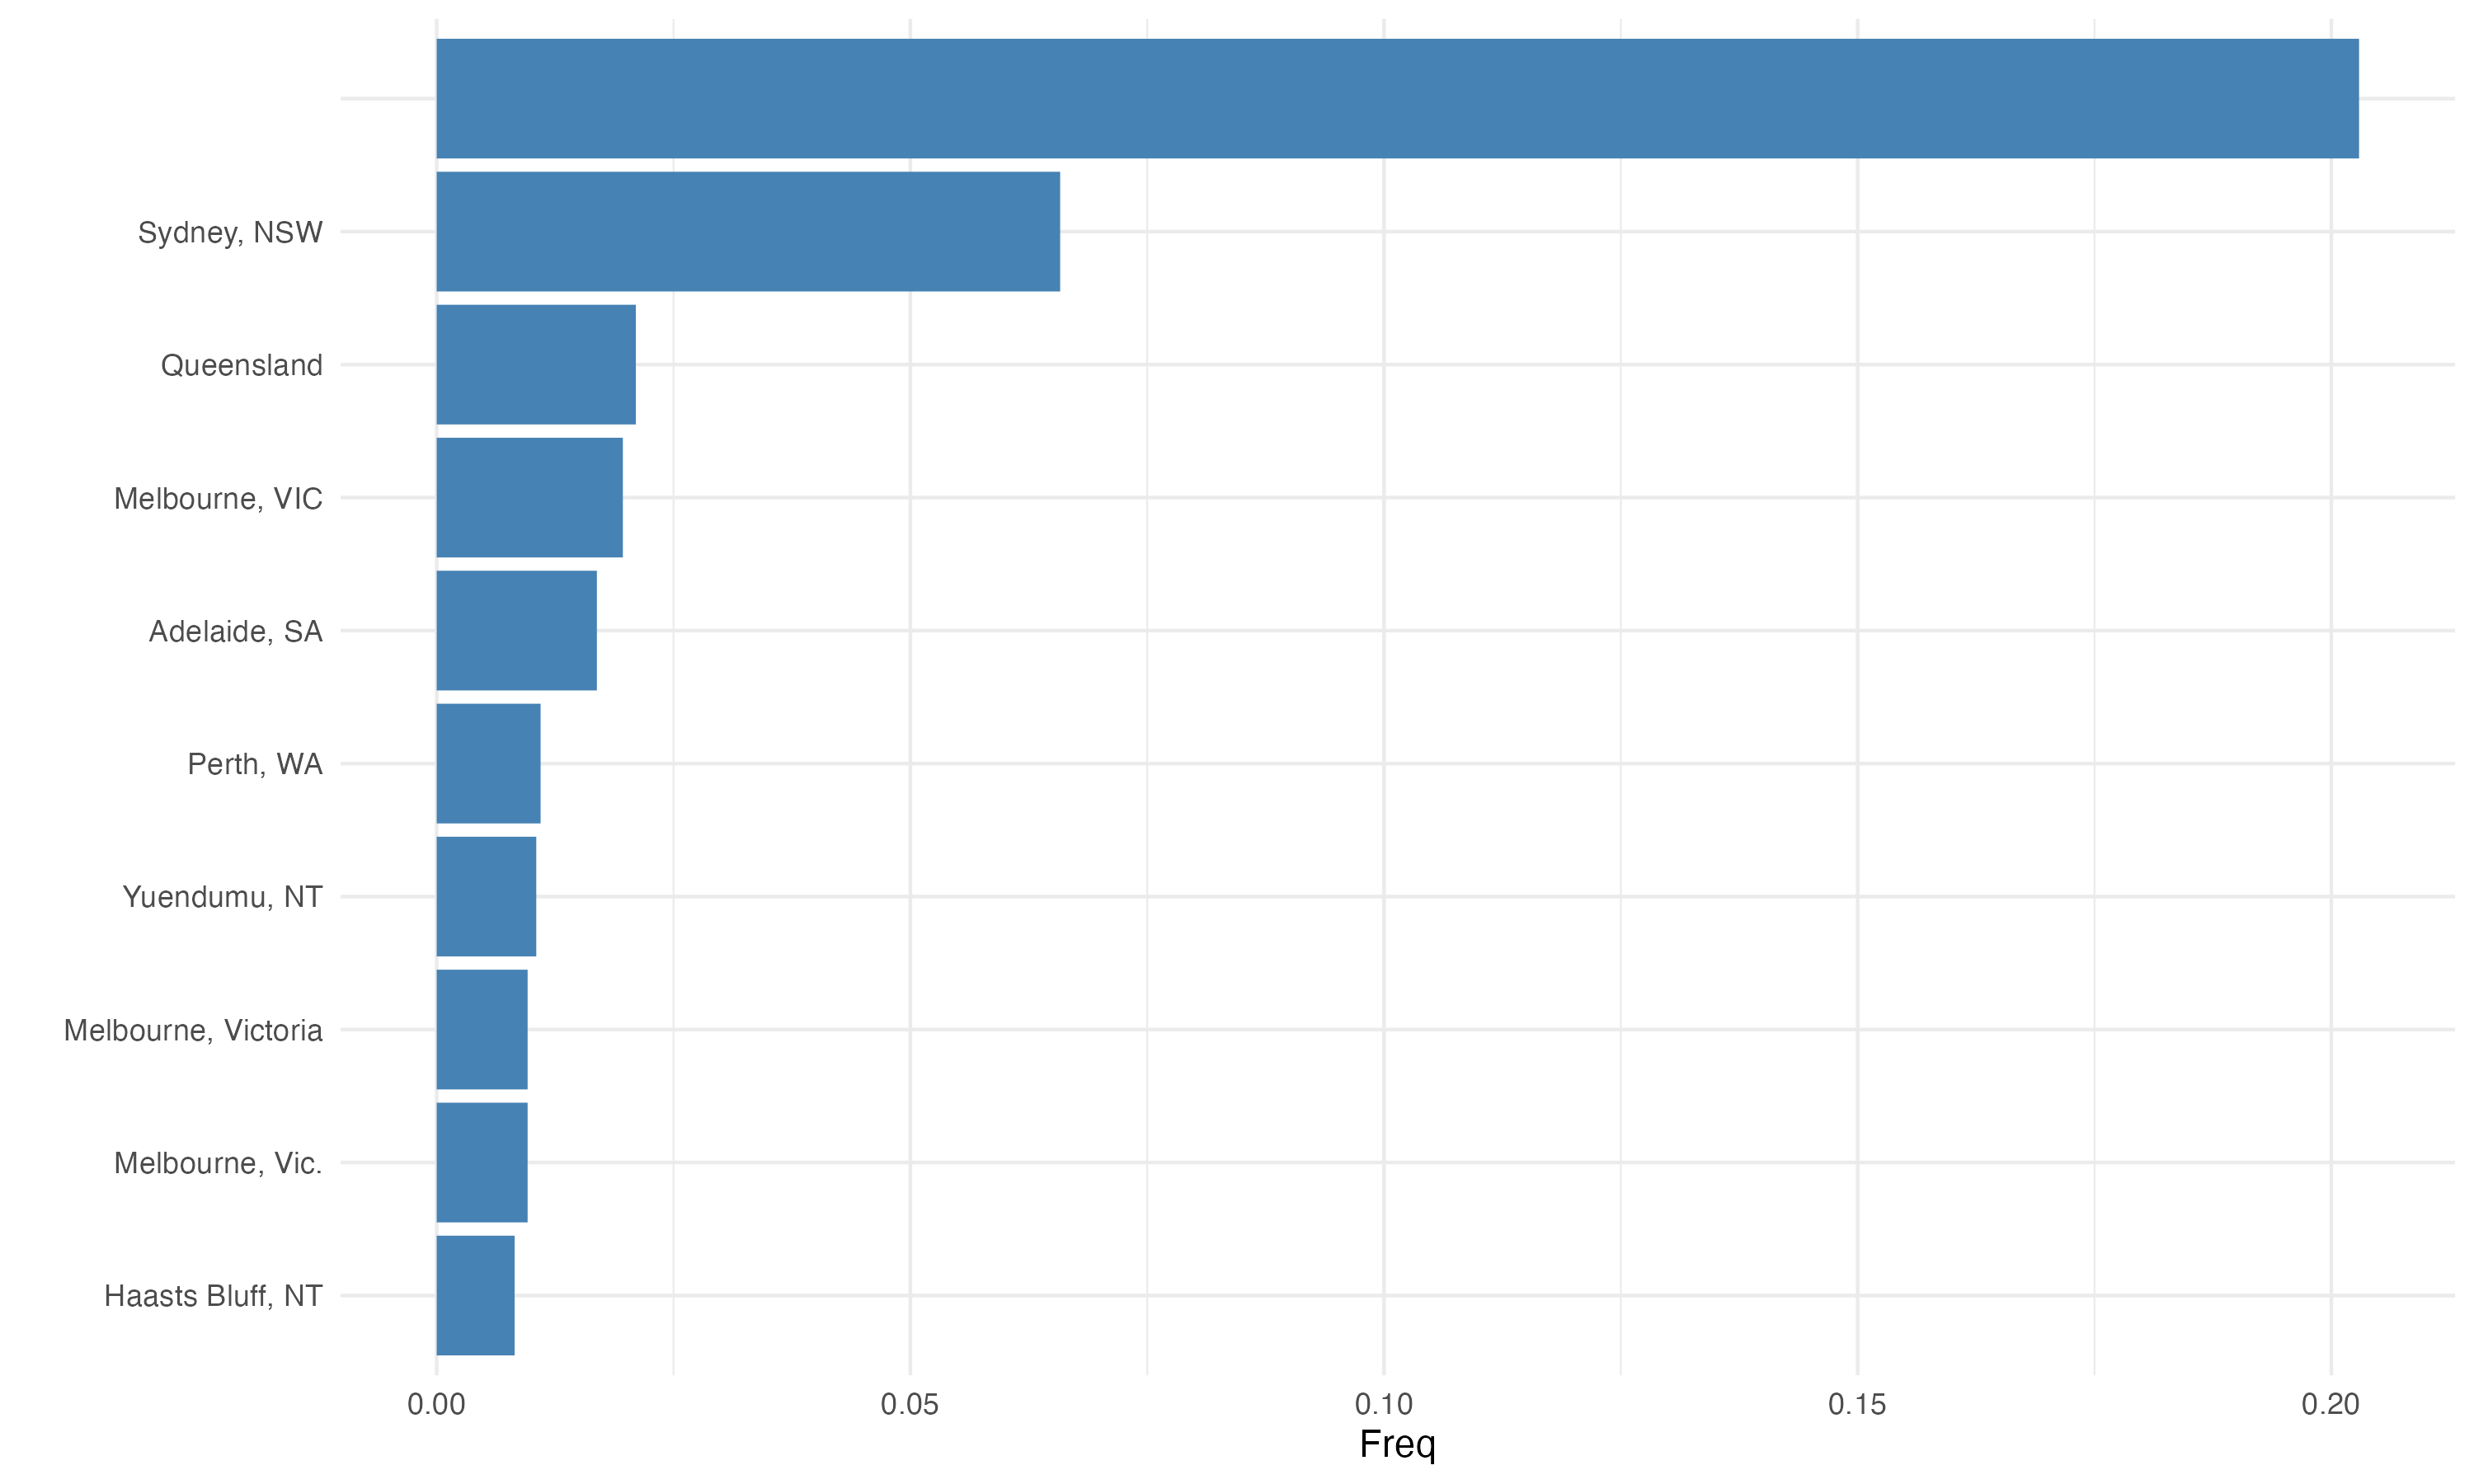

In [17]:
Image(filename='images/DAAO500_6.png')

### Roles, most frequently occurring

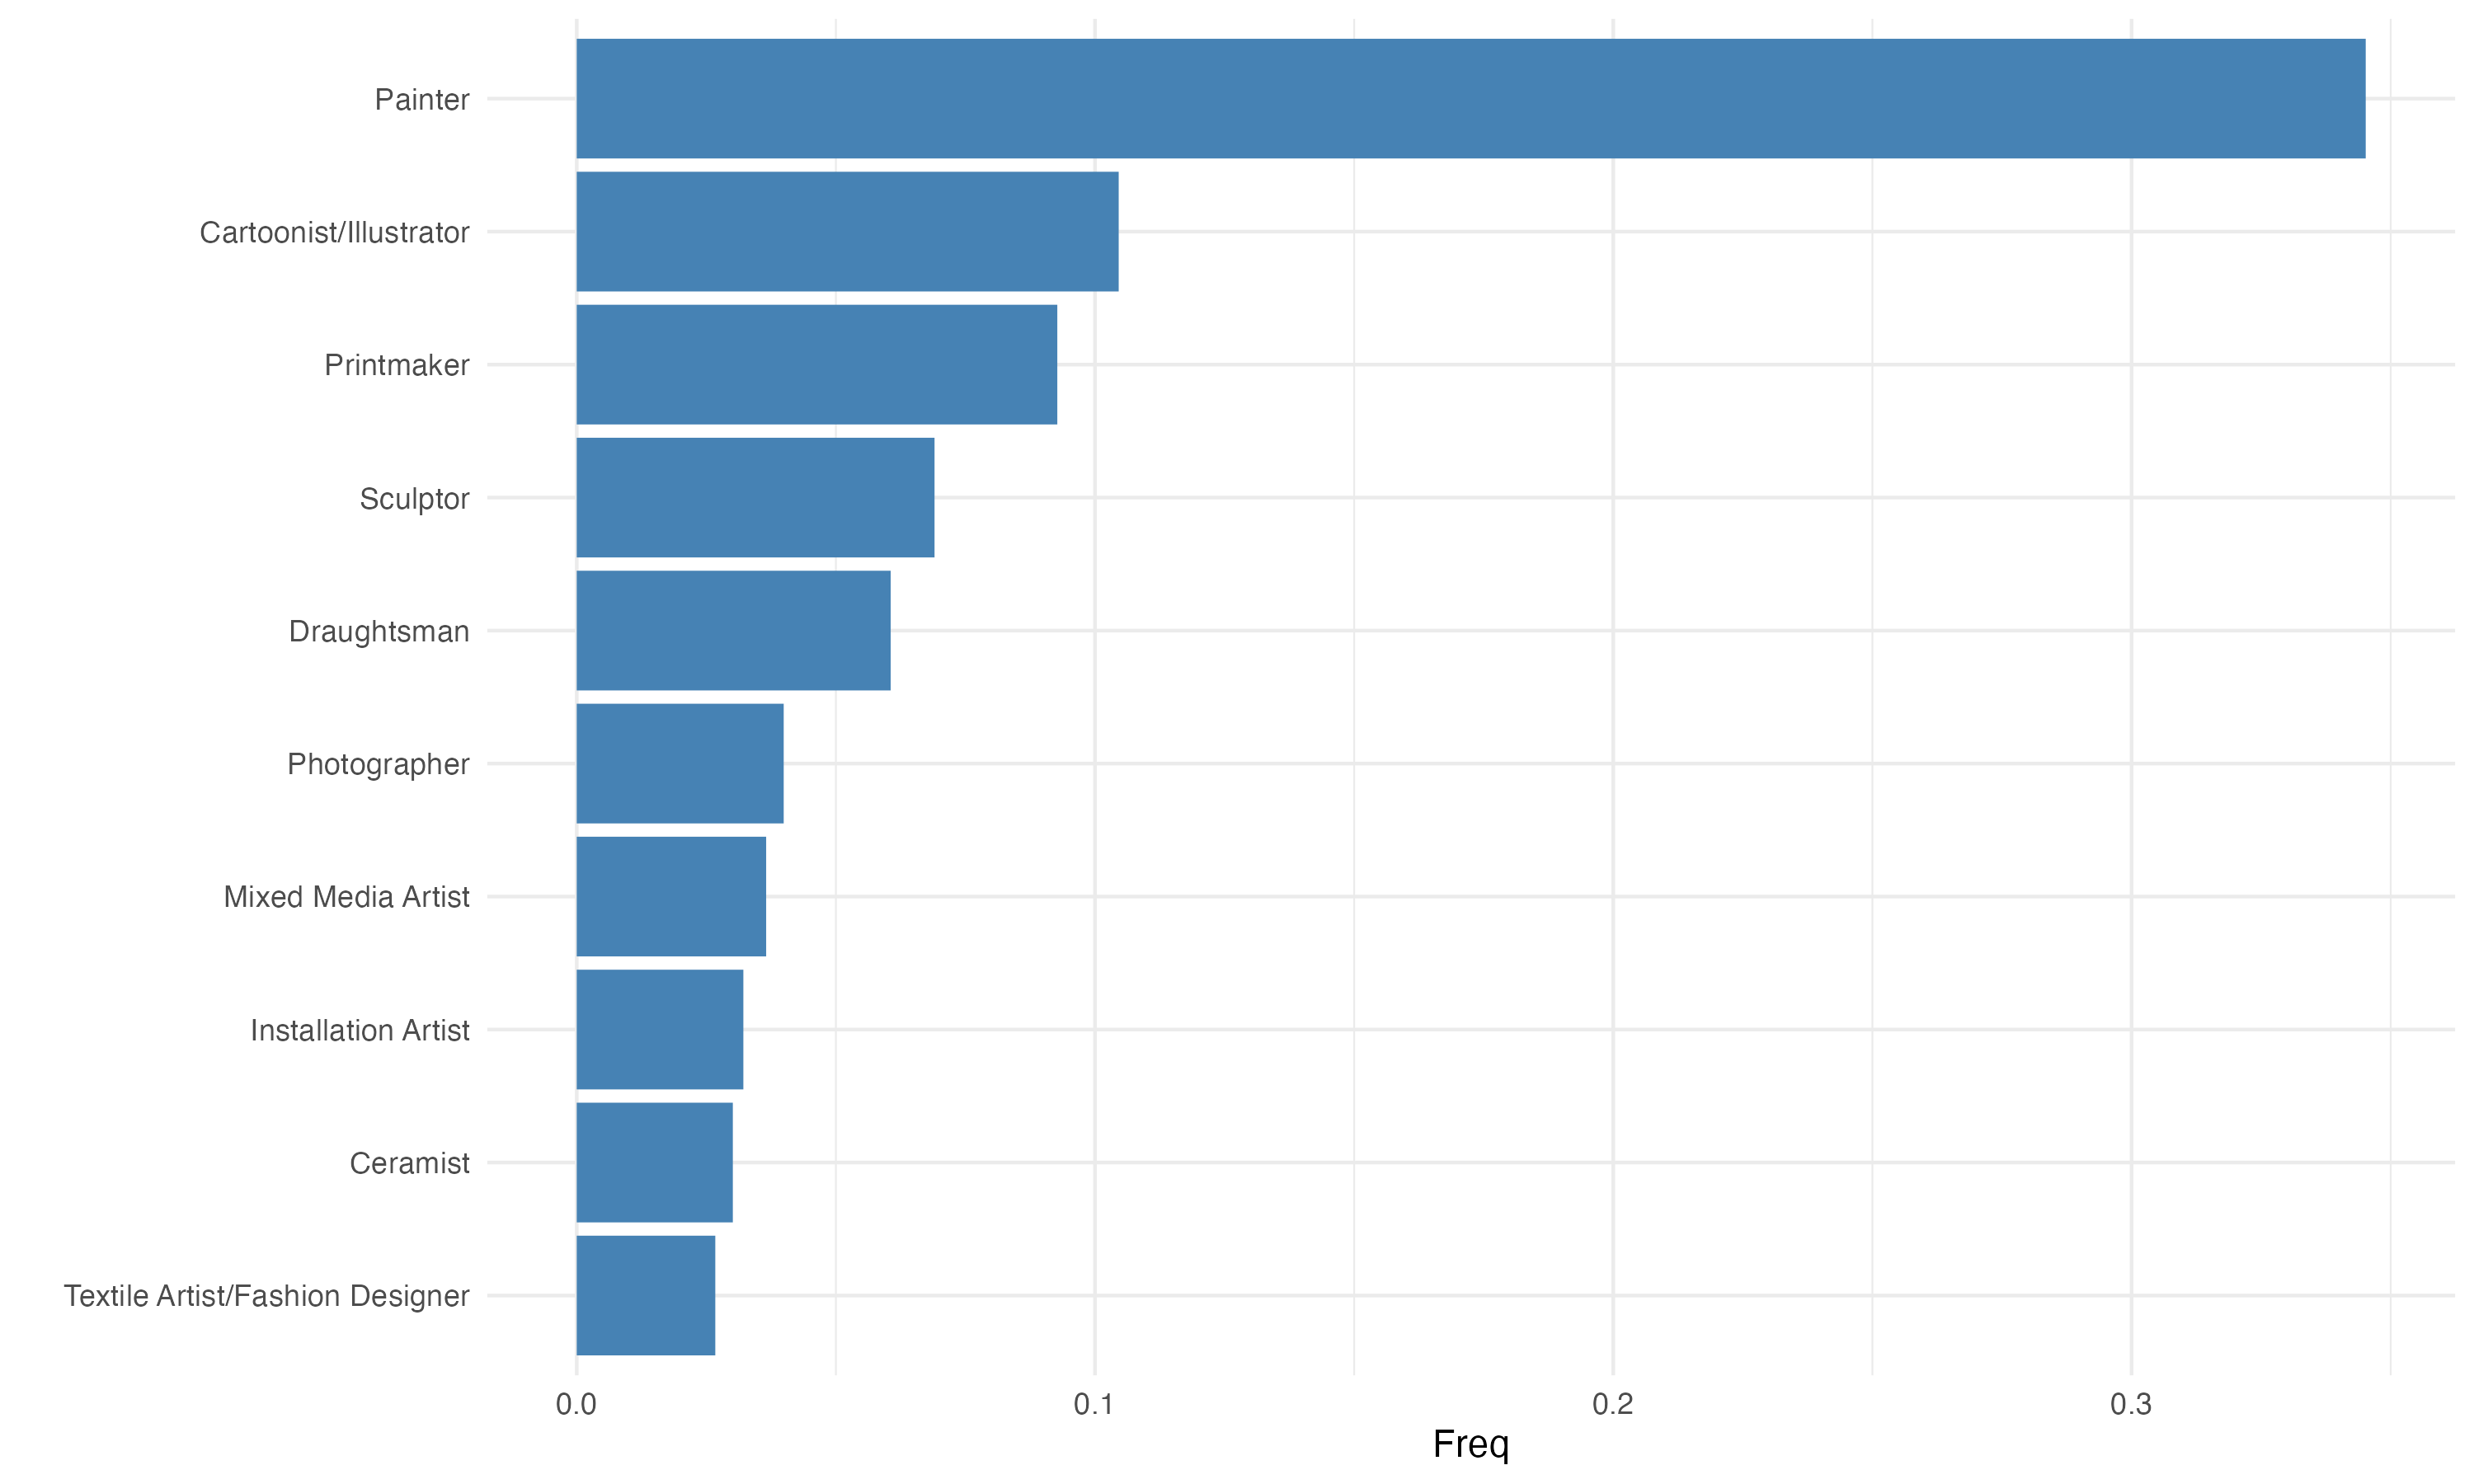

In [18]:

Image(filename='images/DAAO500_7.png')

### Roles, most frequently occurring by gender

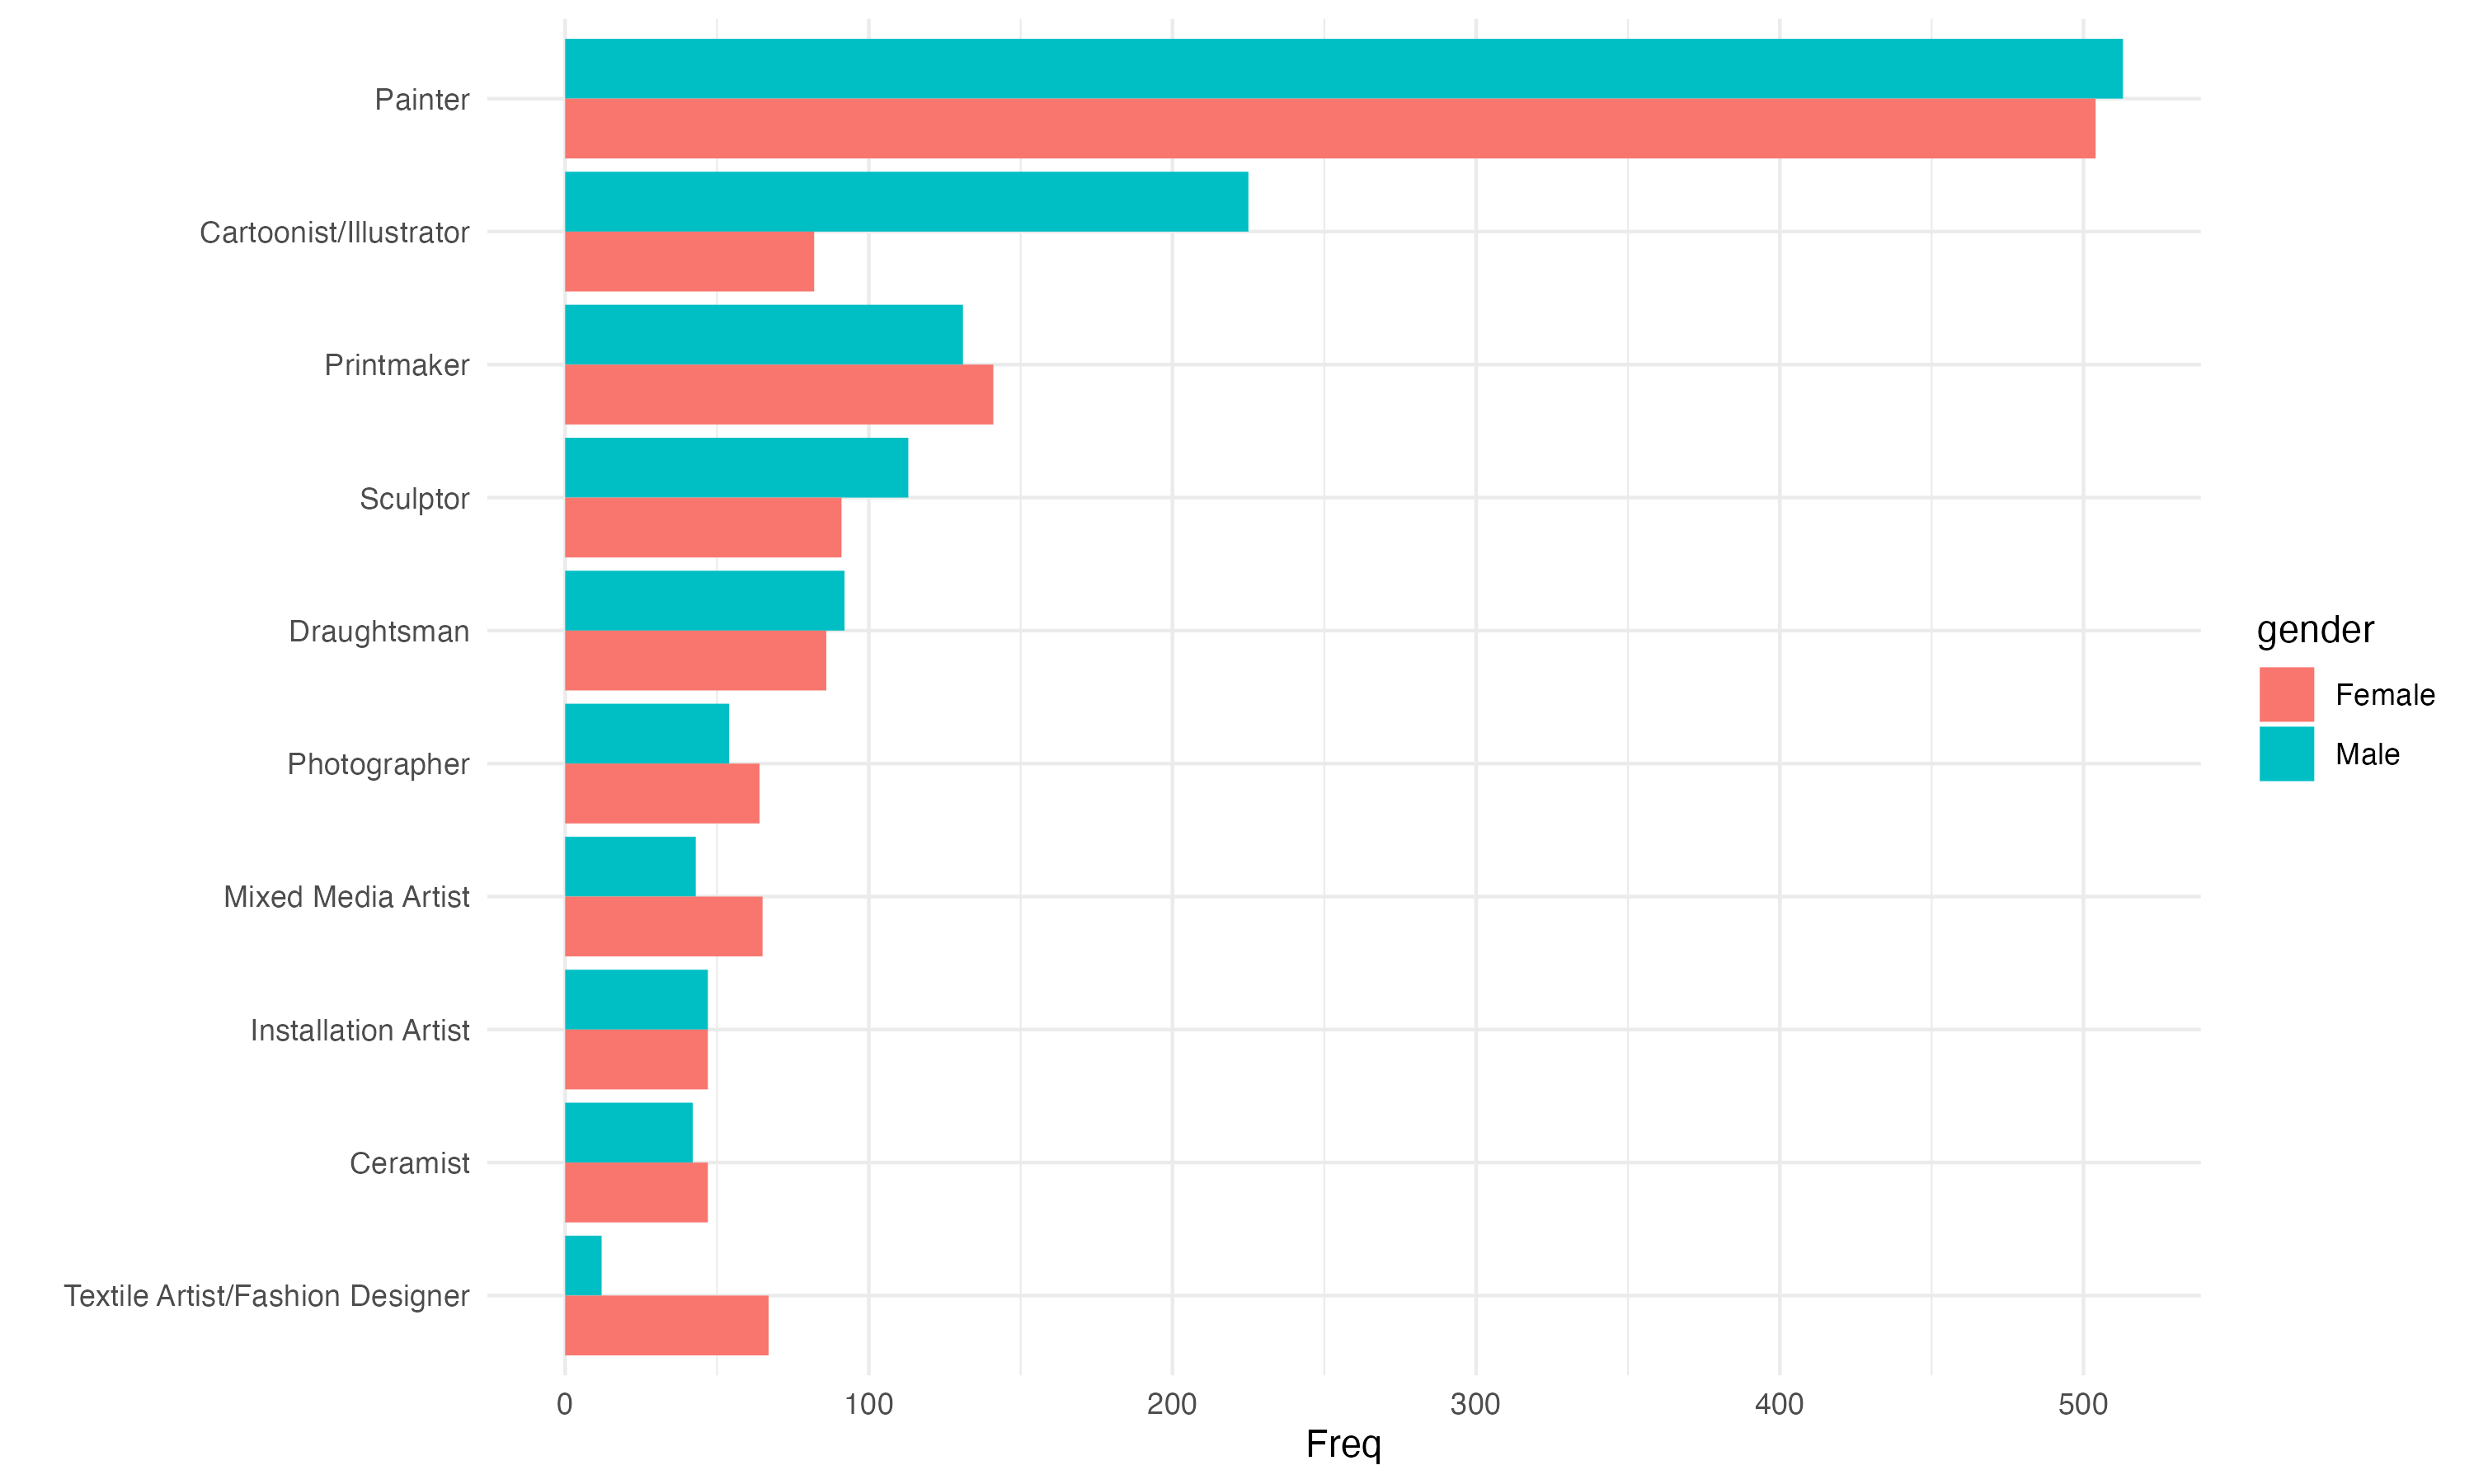

In [19]:
Image(filename='images/DAAO500_8.png')

### Number of roles

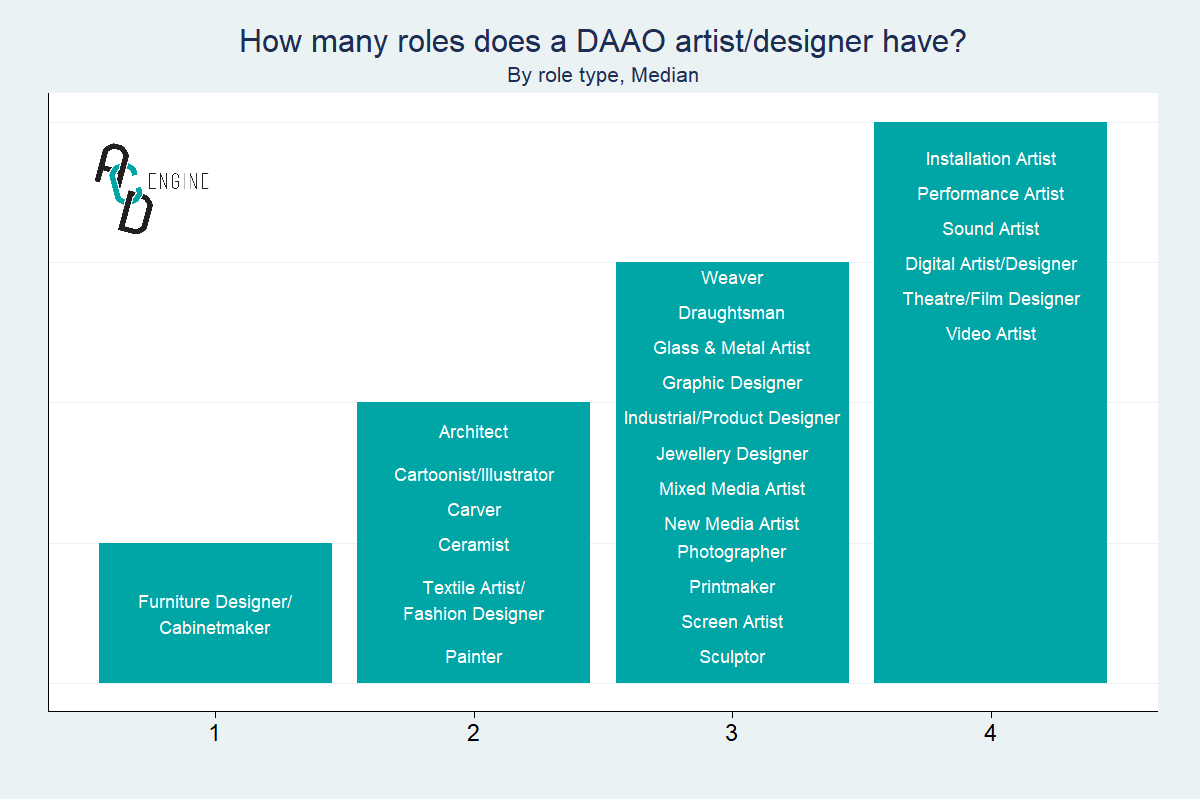

In [3]:
Image(filename='images/AvgNoRoles_v2.png')

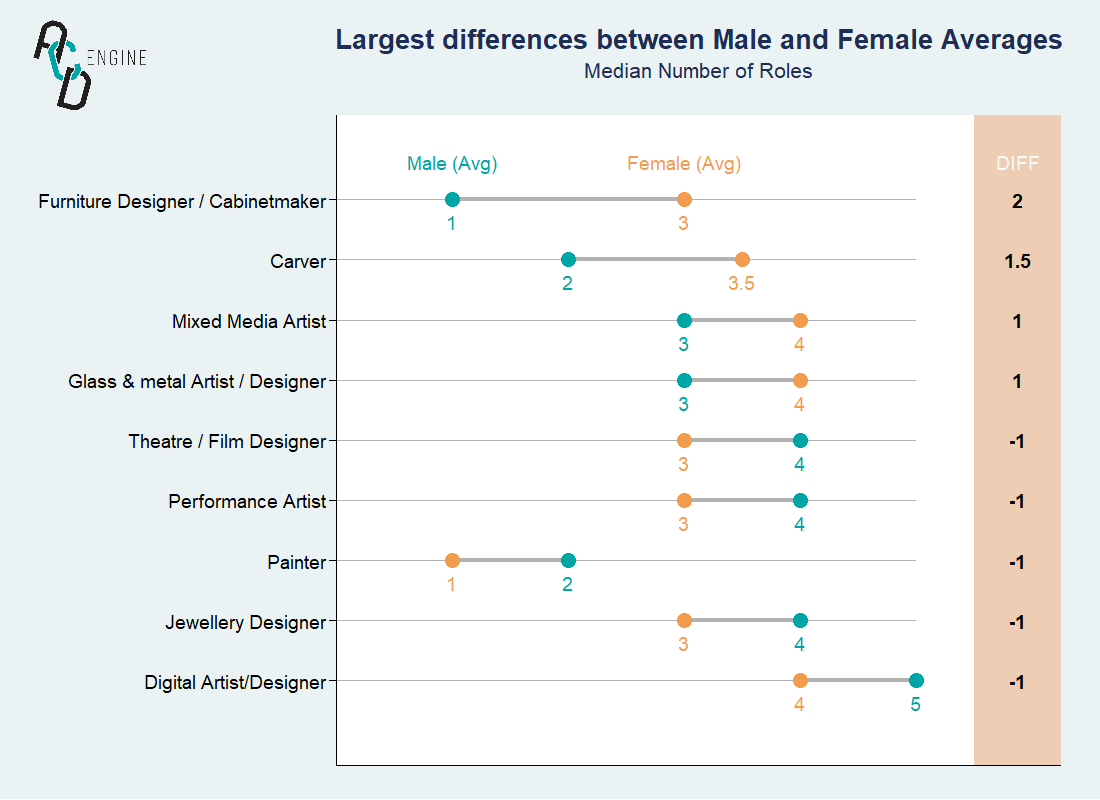

In [9]:
Image(filename='images/RoleDifferences_Gender_v2.png')

### Association rule mining, Roles

- Males who are listed as Installation Artists and Mixed Media Artists are 34.7% more likely than females to also be listed as a Sculptor

- Males who are listed as Graphic Designers are 34.4% more likely than females to also be listed as a Cartoonist/Illustrator

- Males who are listed as Installation Artists and Painters are 20.4% more likely than females to also be listed as a Sculptor

- Males who are listed as Video Artists are 11.8% more likely than females to also be listed as an Installation Artist

- Females who are listed as Draughtsman and Mixed Media Artists are 15.9% more likely than males to also be listed as a Painter

- Females who are listed as Printmaker and Sculptor are 11.4% more likely than males to also be listed as a Painter

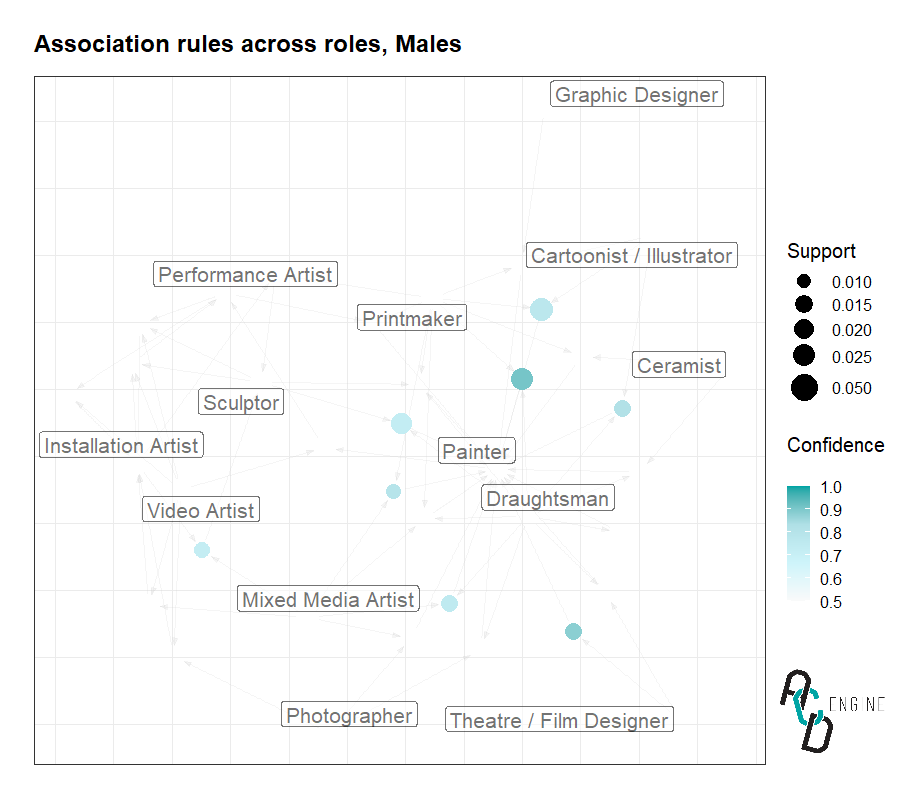

In [22]:
Image(filename='images/RoleAssociations_Males_large.png')

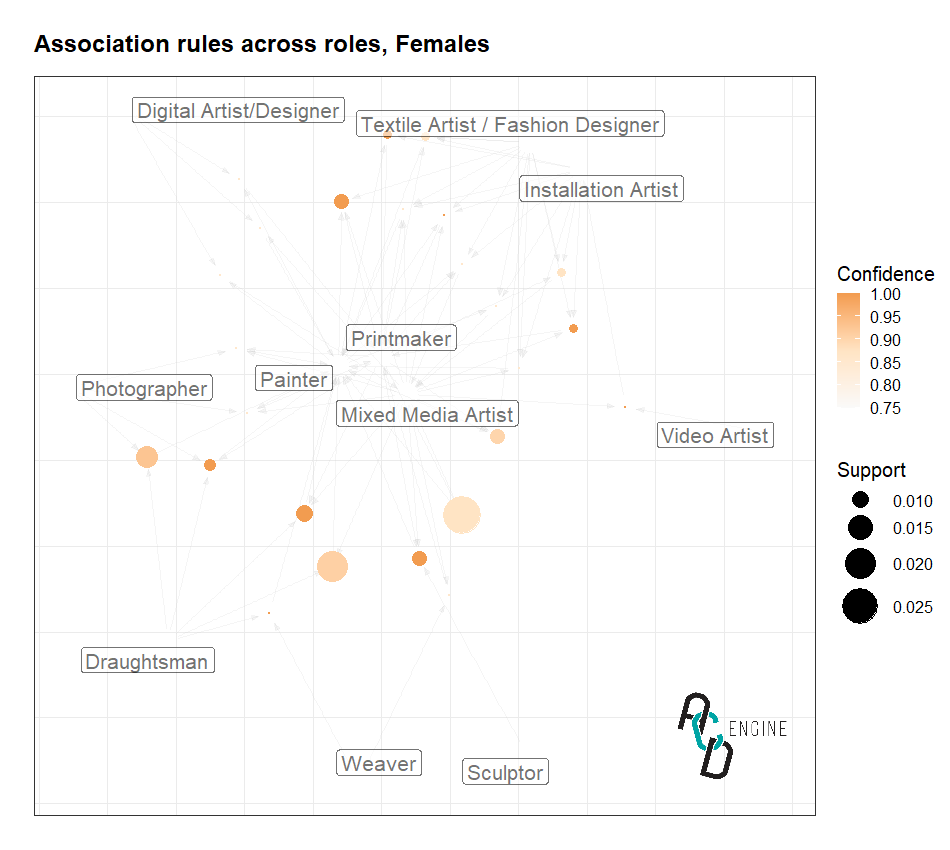

In [21]:
Image(filename='images/RoleAssociations_Females_large.png')

### Exhibitions, Artist Analysis

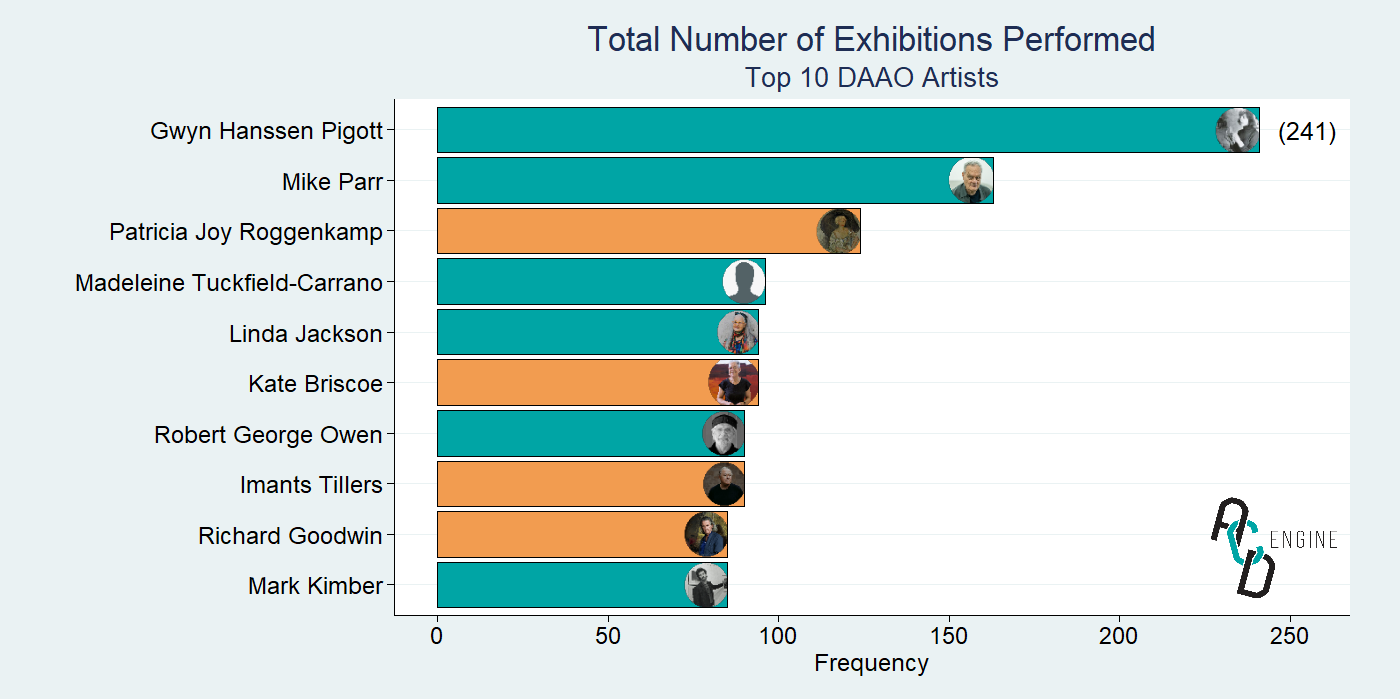

In [ ]:
Image(filename='images/TopArtists_highlighted.png')

### Exhibition partipication over time, Males and Females

In [2]:
with open('data/artist_event_records.json') as json_file: event_artist_records=json.load(json_file)

artists_with_exhibitions=pd.DataFrame()
for event_with_artists in event_artist_records:
    for artist in event_with_artists['artist_bio']:
        if artist['_id']['$oid'] in df['_id'].unique():
            to_add = pd.json_normalize(artist)
            to_add['event_id'] = event_with_artists['_id']['$oid']
            artists_with_exhibitions=artists_with_exhibitions.append(to_add)

### Event Type Distribution
with open("data/daao_event_level.json") as json_file: daoo_event_data=json.load(json_file)
daoo_event_data_geolocated=[coverage_event for coverage_event in [event for event in daoo_event_data if 'coverages' in event] if 'place' in coverage_event['coverages'][0]]
daoo_event_data_geolocated_dates=[event for event in daoo_event_data_geolocated if 'date_range' in event['coverages'][0]]

relevenat_daoo_event_data=[]
for geolocated_event_date in daoo_event_data_geolocated_dates:
    try:
        relevenat_daoo_event_data.append({
            "id":geolocated_event_date['_id']['$oid'],
            'title':geolocated_event_date['title'],
            'start_date':geolocated_event_date['coverages'][0]['date_range']['start']['_date'],
            "end_date":geolocated_event_date['coverages'][0]['date_range']['end']['_date'],
            "place_name":geolocated_event_date['coverages'][0]['place'][0]['address'],
            'latitude':geolocated_event_date['coverages'][0]['place'][0]['centroid']['latitude'],
            'longitude':geolocated_event_date['coverages'][0]['place'][0]['centroid']['longitude'],
            'type_slug':geolocated_event_date['types'][0]['slug']
        })
    except:
        continue

df_daoo_relevant_events=pd.DataFrame(relevenat_daoo_event_data)
df_daoo_relevant_events=df_daoo_relevant_events[df_daoo_relevant_events['type_slug'].isin(["exhibition",'festival','performance-event','other-event'])]

# Exhibition Temporal Analysis (1900 to 2020s)
df_daoo_relevant_events_exb=df_daoo_relevant_events[df_daoo_relevant_events['type_slug']=="exhibition"]
df_daoo_relevant_events_exb['start_year']=[int(start_date.split('-')[0]) for start_date in df_daoo_relevant_events_exb['start_date']]
df_daoo_relevant_events_exb['end_year']=[int(end_date.split('-')[0]) for end_date in df_daoo_relevant_events_exb['end_date']]

# males
events_males = df_daoo_relevant_events_exb[df_daoo_relevant_events_exb['id']\
               .isin(artists_with_exhibitions[artists_with_exhibitions.gender=='male']['event_id']\
               .unique())]

events_males['start_year_decade'] = [ int(np.floor(int(year)/10) * 10) 
                            for year in np.array(events_males['start_year'])]
events_males['gender'] = 'Male'

events_males_tab = events_males['start_year_decade']\
.value_counts()\
.reset_index()\
.sort_values('index')

events_males_tab = events_males_tab[events_males_tab['index'] > 1900]
events_males_tab['gender'] = 'Male'

# females
events_females = df_daoo_relevant_events_exb[df_daoo_relevant_events_exb['id']\
               .isin(artists_with_exhibitions[artists_with_exhibitions.gender=='female']['event_id']\
               .unique())]

events_females['start_year_decade'] = [ int(np.floor(int(year)/10) * 10) 
                            for year in np.array(events_females['start_year'])]
events_females['gender'] = 'Female'

events_females_tab = events_females['start_year_decade']\
.value_counts()\
.reset_index()\
.sort_values('index')

events_females_tab = events_females_tab[events_females_tab['index'] > 1910]
events_females_tab['gender'] = 'Female'

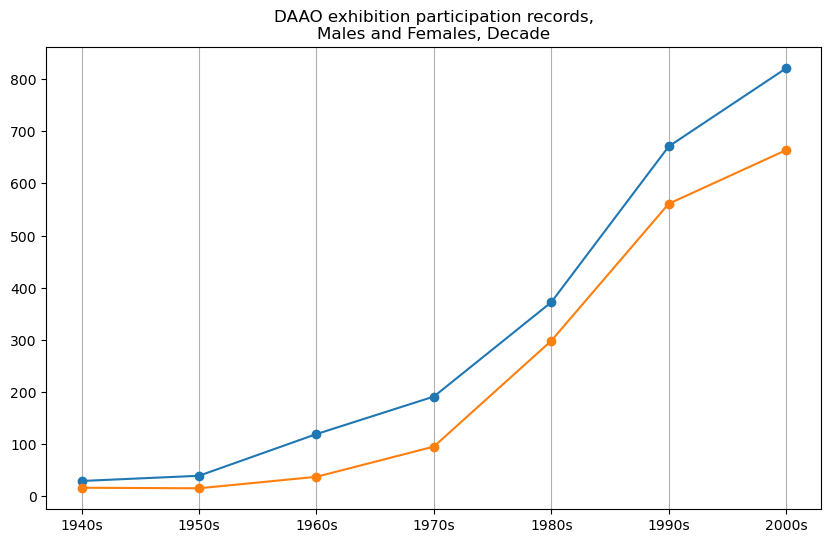

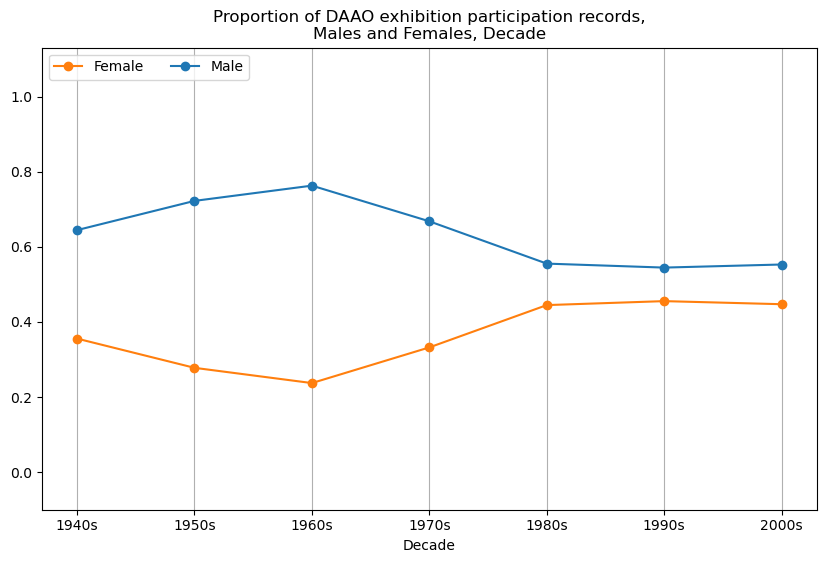

In [7]:
# gender frequency over decade
events_males_tab = events_males_tab[events_males_tab['index'] > 1939]
events_males_tab = events_males_tab[events_males_tab['index'] < 2001]

events_females_tab = events_females_tab[events_females_tab['index'] > 1939]
events_females_tab = events_females_tab[events_females_tab['index'] < 2001]

fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(events_males_tab['index'], events_males_tab['start_year_decade'], label="Male", marker='o')
plt.plot(events_females_tab['index'], events_females_tab['start_year_decade'], label="Female", marker='o')
plt.title('DAAO exhibition participation records,\nMales and Females, Decade')
plt.xticks(range(1940, 2010, 10), 
        ['1940s', '1950s', '1960s','1970s', '1980s', '1990s','2000s'])
plt.grid(axis='x')
plt.show()

# gender proportion over decade
events_mixed = events_males.append(events_females)
events_mixed = events_mixed[events_mixed['start_year_decade'] > 1939]
events_mixed = events_mixed[events_mixed['start_year_decade'] < 2001]

ax = pd.crosstab(events_mixed['start_year_decade'],
            events_mixed['gender'], normalize='index')\
.plot(rot=0, figsize=(10,6), color=['tab:orange','tab:blue'], marker='o')

# adjust legend
ax.legend(loc="upper left", ncol=2)

plt.xlabel('Decade')
plt.ylim([-0.1, 1.13])
plt.grid(axis='x')
plt.xticks(range(1940, 2010, 10), 
        ['1940s', '1950s', '1960s','1970s', '1980s', '1990s','2000s'])
plt.title('Proportion of DAAO exhibition participation records,\nMales and Females, Decade')
plt.show()

### Frequency of DAAO records with exhibition data

In [9]:
def drilldown_by_role(role='Painter', data=None):
    byrole = data[data['term'] == role]
    # males
    events_males = df_daoo_relevant_events_exb[df_daoo_relevant_events_exb['id']\
                   .isin(byrole[byrole.gender=='male']['event_id']\
                   .unique())]

    events_males['start_year_decade'] = [ int(np.floor(int(year)/10) * 10) 
                                for year in np.array(events_males['start_year'])]
    events_males['gender'] = 'Male'

    events_males_tab = events_males['start_year_decade']\
    .value_counts()\
    .reset_index()\
    .sort_values('index')

    events_males_tab = events_males_tab[events_males_tab['index'] > 1900]
    events_males_tab['gender'] = 'Male'

    # females
    events_females = df_daoo_relevant_events_exb[df_daoo_relevant_events_exb['id']\
                   .isin(byrole[byrole.gender=='female']['event_id']\
                   .unique())]

    events_females['start_year_decade'] = [ int(np.floor(int(year)/10) * 10) 
                                for year in np.array(events_females['start_year'])]
    events_females['gender'] = 'Female'

    events_females_tab = events_females['start_year_decade']\
    .value_counts()\
    .reset_index()\
    .sort_values('index')

    events_females_tab = events_females_tab[events_females_tab['index'] > 1910]
    events_females_tab['gender'] = 'Female'

    # gender frequency over decade
    events_males_tab = events_males_tab[events_males_tab['index'] > 1939]
    events_males_tab = events_males_tab[events_males_tab['index'] < 2001]

    events_females_tab = events_females_tab[events_females_tab['index'] > 1939]
    events_females_tab = events_females_tab[events_females_tab['index'] < 2001]

    fig, ax = plt.subplots(figsize=(10, 6))
    plt.plot(events_males_tab['index'], 
             events_males_tab['start_year_decade'], 
             label="Male", marker='o')
    plt.plot(events_females_tab['index'], 
             events_females_tab['start_year_decade'], 
             label="Female", marker='o')
    plt.xticks(range(1940, 2010, 10), 
           ['1940s', '1950s', '1960s','1970s', '1980s', '1990s','2000s'])
    plt.grid(axis='x')
    if events_males_tab['start_year_decade'].max() > events_females_tab['start_year_decade'].max():
        plt.ylim(0,events_males_tab['start_year_decade'].max()*1.2)
    else: plt.ylim(0,events_females_tab['start_year_decade'].max()*1.2)
    plt.title(f'{role} participation in DAAO exhibition records,\nMales and Females, Decade')
    ax.legend(loc="upper right", ncol=2)
    plt.show()

    # gender proportion over decade
    events_mixed = events_males.append(events_females)
    events_mixed = events_mixed[events_mixed['start_year_decade'] > 1939]
    events_mixed = events_mixed[events_mixed['start_year_decade'] < 2001]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    ff = pd.DataFrame(pd.crosstab(events_mixed['start_year_decade'],
                    events_mixed['gender'],normalize='index')['Female']).reset_index()
    mm = pd.DataFrame(pd.crosstab(events_mixed['start_year_decade'],
                    events_mixed['gender'],normalize='index')['Male']).reset_index()

    plt.plot(mm['start_year_decade'], 
             mm['Male'], 
             label="Males", marker='o')
    plt.plot(ff['start_year_decade'], 
             ff['Female'], 
             label="Females", marker='o')

    ax.legend(loc="upper right", ncol=2)
    
    plt.xlabel('Decade')
    plt.ylim([-0.1, 1.13])
    plt.grid(axis='x')
    plt.xticks(range(1940, 2010, 10), 
       ['1940s', '1950s', '1960s','1970s', '1980s', '1990s','2000s'])

    plt.title(f'{role} participation proportion in DAAO exhibition records,\nMales and Females, Decade')
    plt.show()

gender_roles_time = pd.DataFrame()

for idx,x in artists_with_exhibitions[['_id.$oid','gender','roles','event_id']].iterrows():
    xx = pd.json_normalize(x['roles'])
    try: xxx = pd.json_normalize(xx['detailed_role'])[0]
    except: continue
    for y in xxx:
        if y is None: continue
        x['term'] = pd.json_normalize(y)['unique_term'].values[0]
        gender_roles_time = gender_roles_time.append(pd.DataFrame(x).T)
        
gender_roles_time.term.value_counts()

Painter                                                 3293
Sculptor                                                1757
Printmaker                                              1604
Installation Artist                                     1321
Draughtsman                                             1206
Mixed Media Artist                                      1120
Photographer                                            1092
Performance Artist                                       619
Video Artist                                             499
Ceramist                                                 472
Screen Artist                                            400
Textile Artist / Fashion Designer                        299
Digital Artist/Designer                                  251
Cartoonist / Illustrator                                 227
Theatre / Film Designer                                  196
Graphic Designer                                         183
Industrial / Product Des

### Drilldown into roles

#### 1. Painter

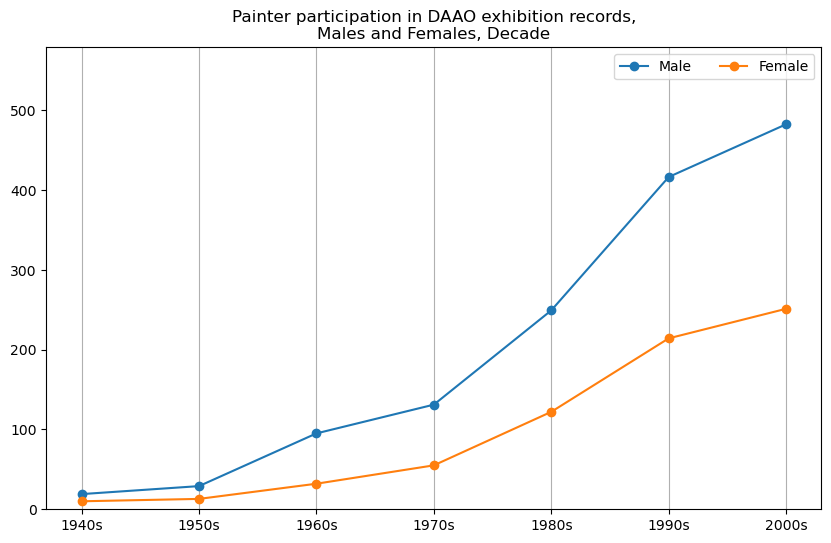

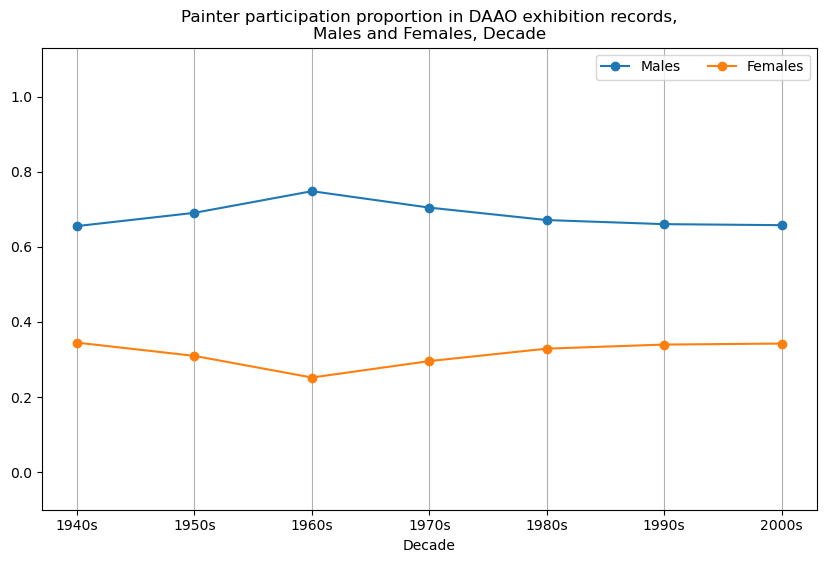

In [11]:
drilldown_by_role(role='Painter', data=gender_roles_time)

#### 2. Cartoonist / Illustrator

It should be noted that this role is the second highest entry in DAAO. However there are very few exhibition records for cartoonists and illustrators.

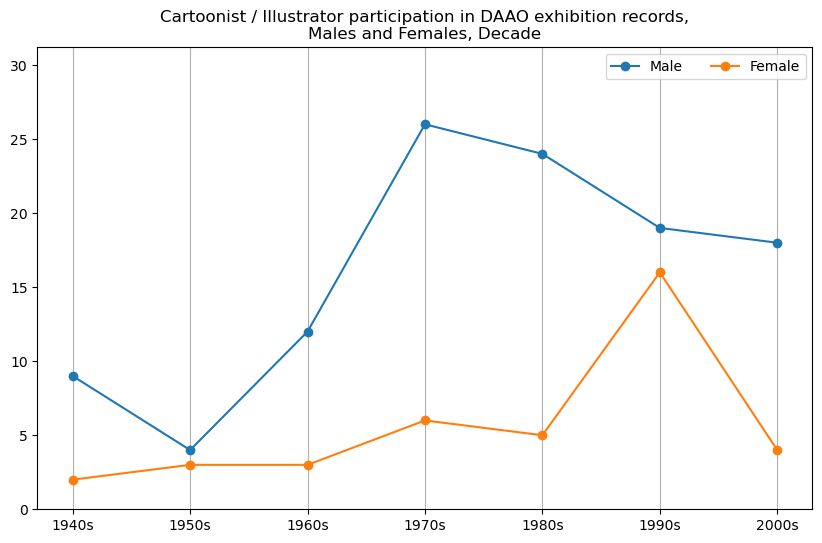

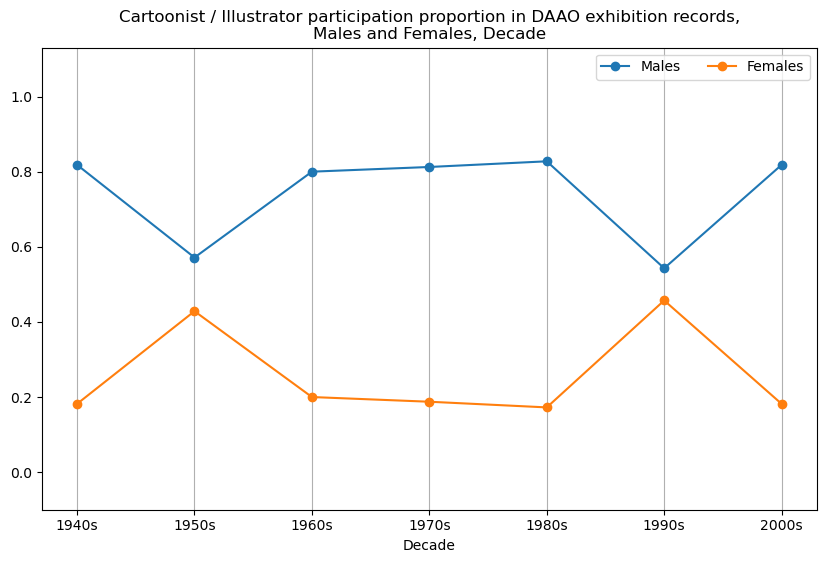

In [12]:
drilldown_by_role(role='Cartoonist / Illustrator', data=gender_roles_time)

#### 3. Printmaker

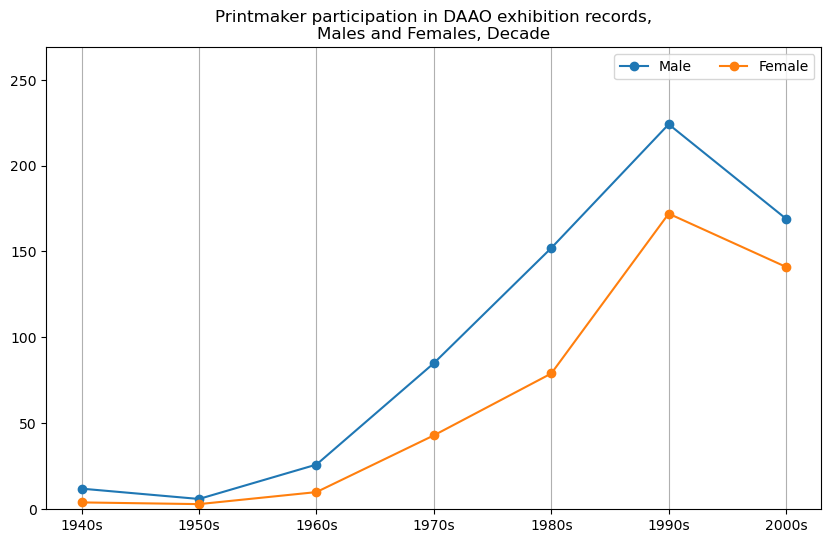

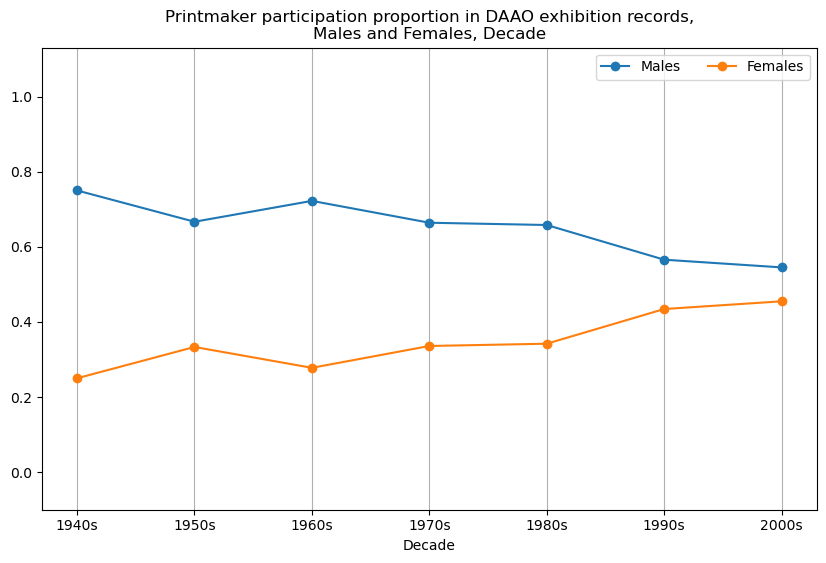

In [13]:
drilldown_by_role(role='Printmaker', data=gender_roles_time)

#### 4. Sculptor

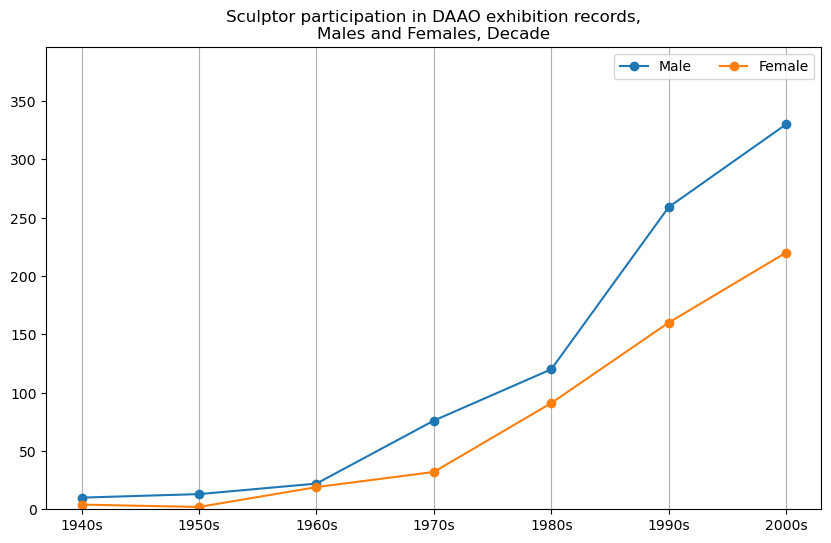

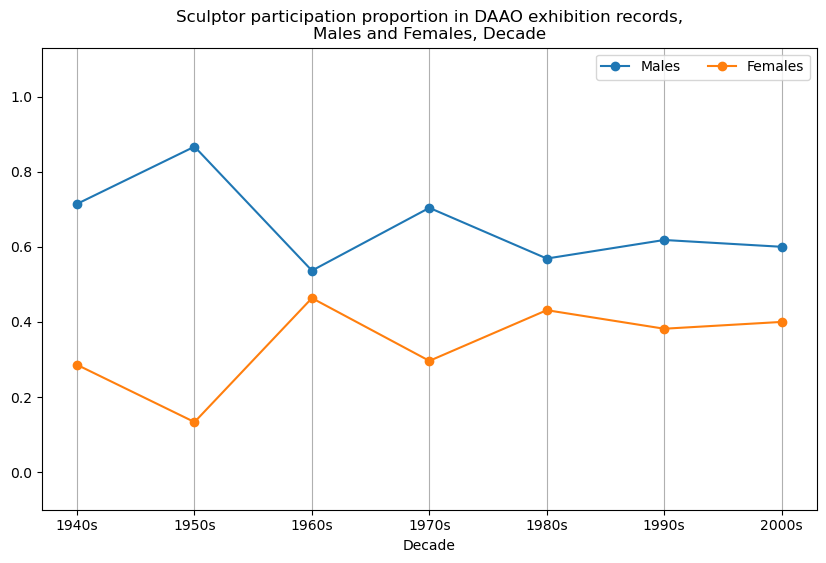

In [14]:
drilldown_by_role(role='Sculptor', data=gender_roles_time)

#### 5. Draughtsman

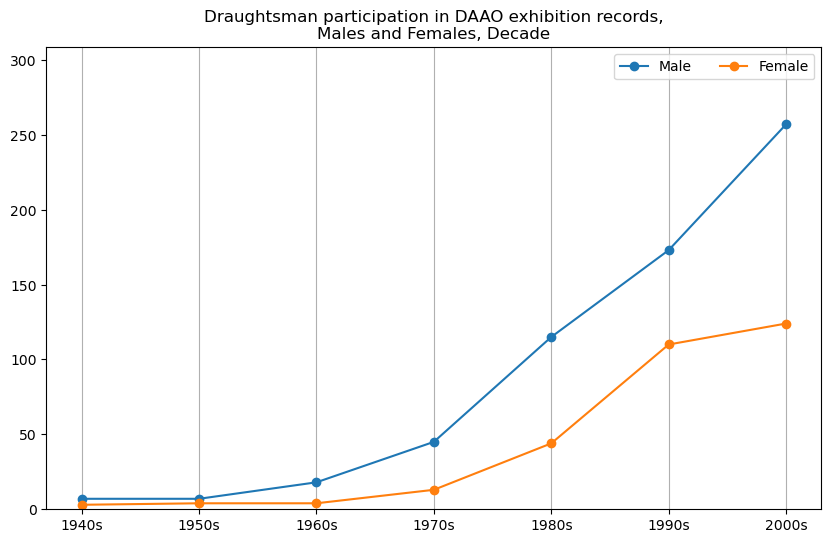

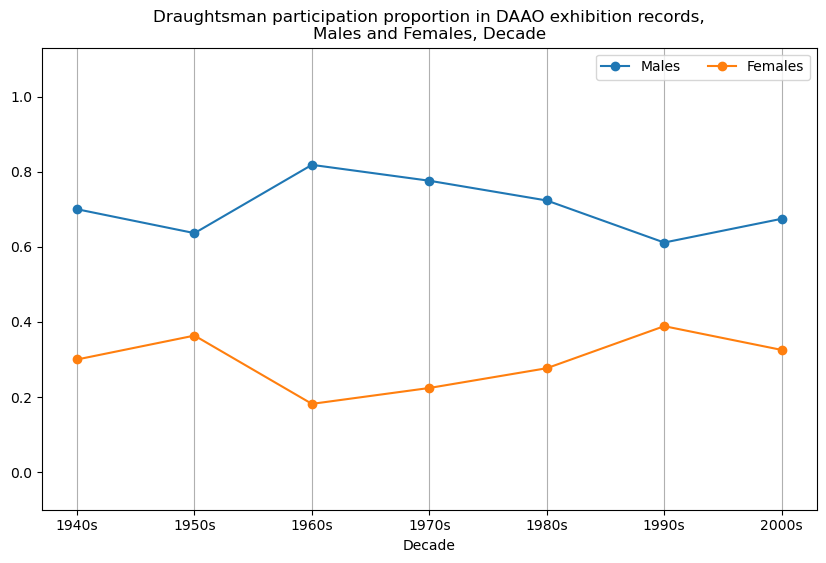

In [15]:
drilldown_by_role(role='Draughtsman', data=gender_roles_time)

#### 6. Photographer

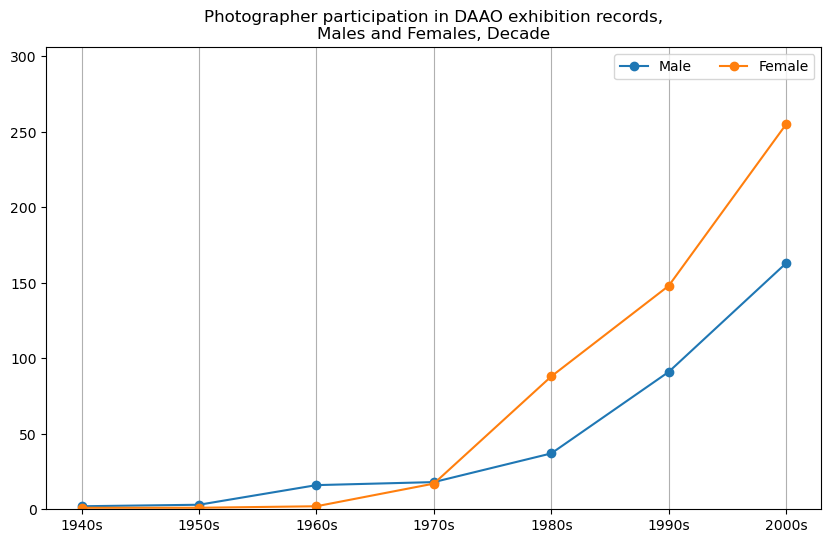

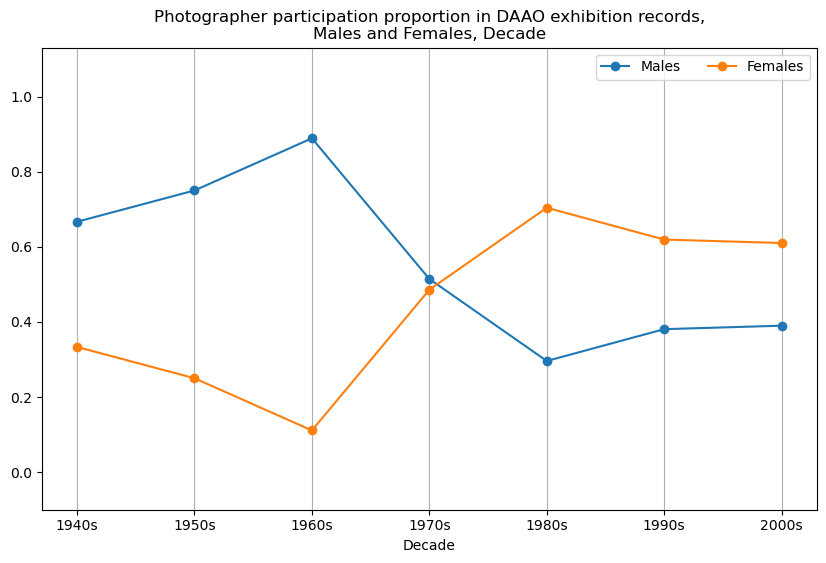

In [16]:
drilldown_by_role(role='Photographer', data=gender_roles_time)

#### 7. Mixed Media Artist

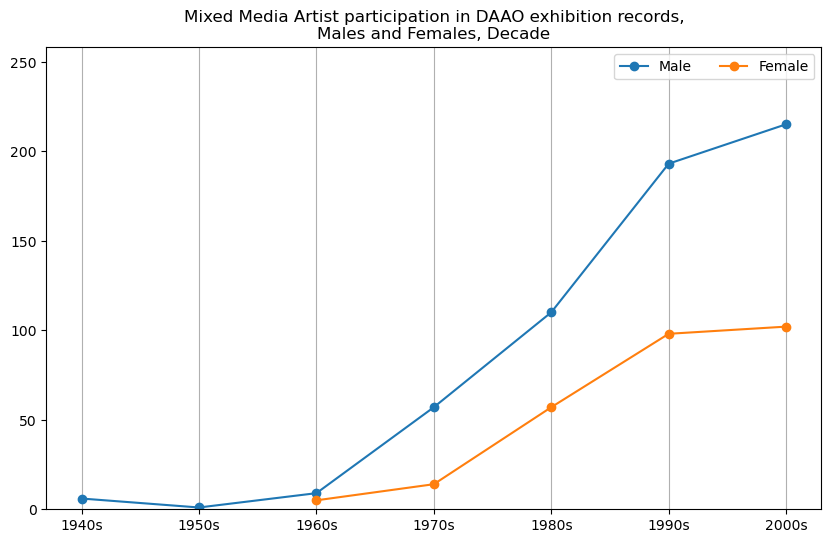

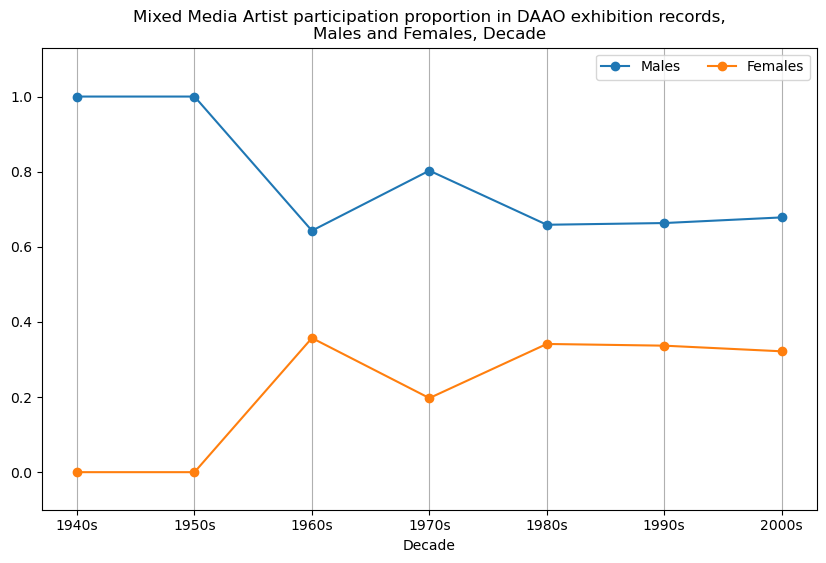

In [17]:
drilldown_by_role(role='Mixed Media Artist', data=gender_roles_time)

#### 8. Installation Artist

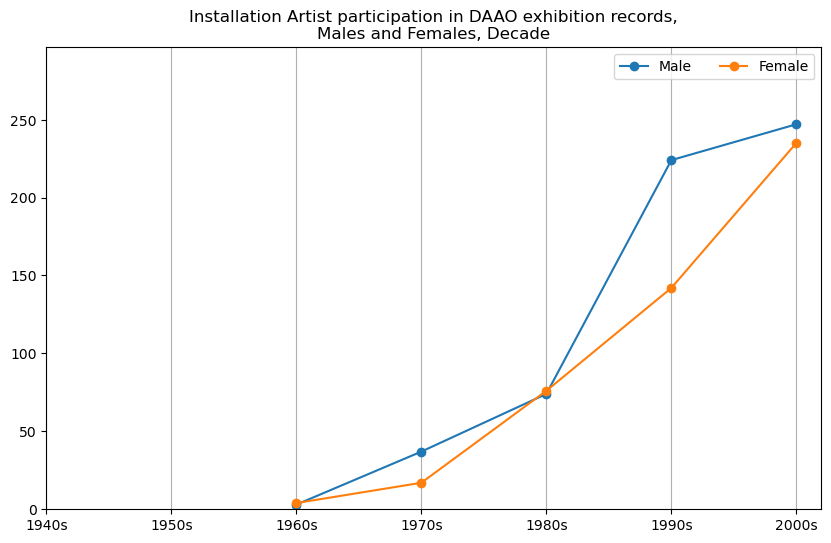

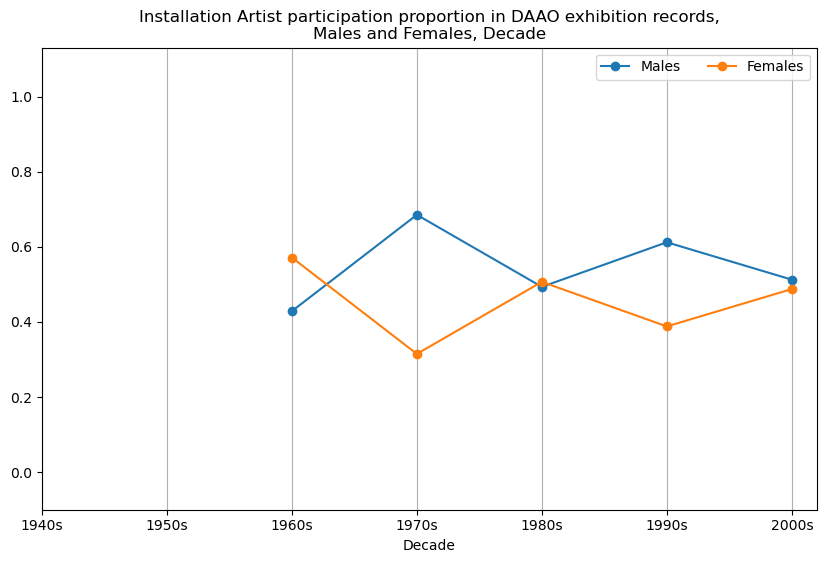

In [18]:
drilldown_by_role(role='Installation Artist', data=gender_roles_time)

#### 9. Ceramist

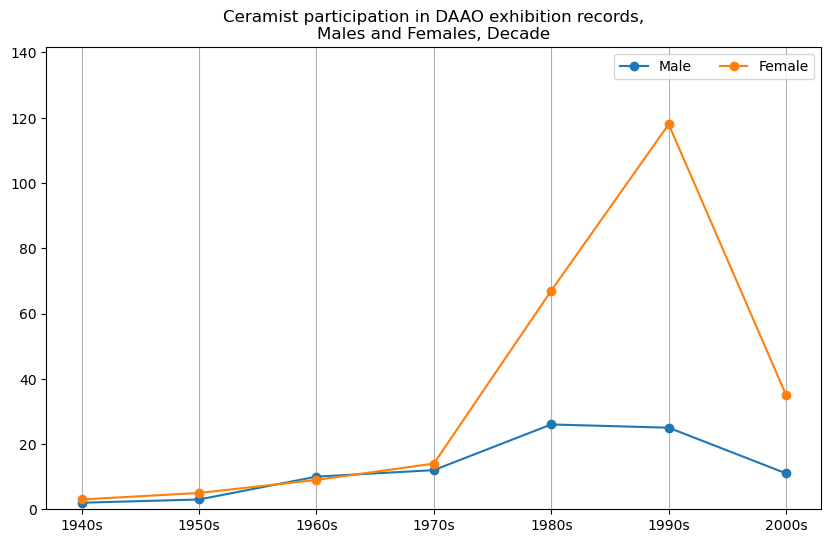

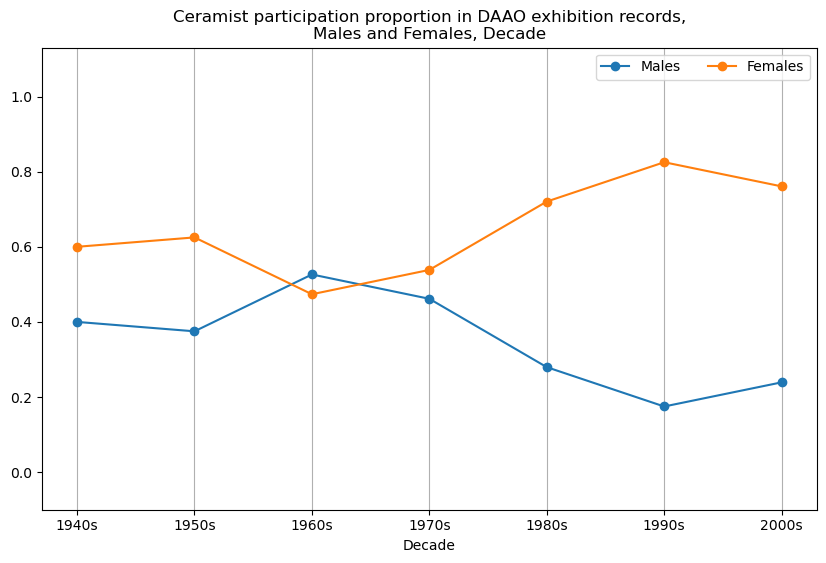

In [19]:
drilldown_by_role(role='Ceramist', data=gender_roles_time)

#### 10. Textile Artist / Fashion Designer

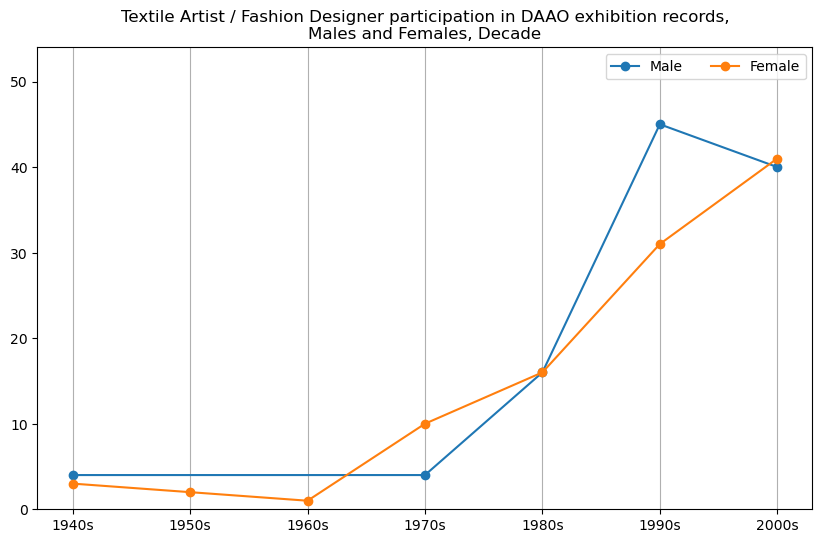

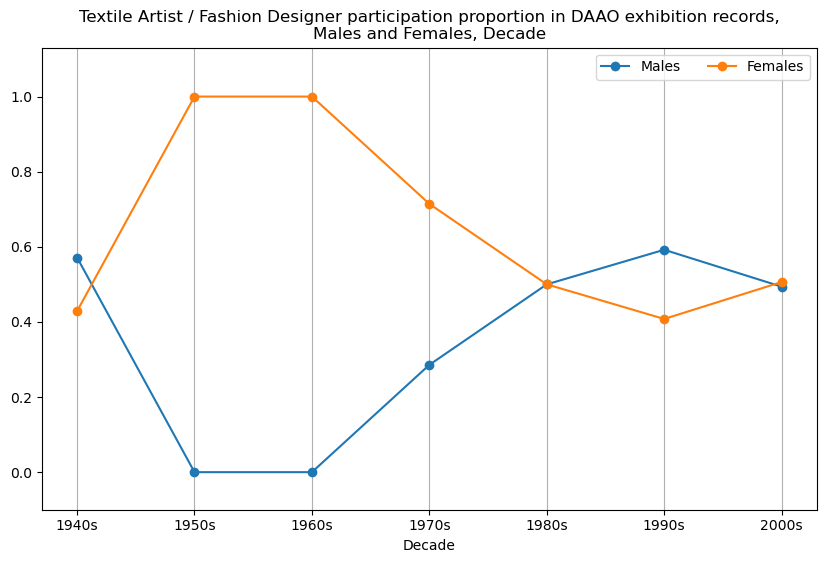

In [20]:
drilldown_by_role(role='Textile Artist / Fashion Designer', data=gender_roles_time)

### Other roles not in top 10, but have relatively more exhibition data than other roles in the top 10

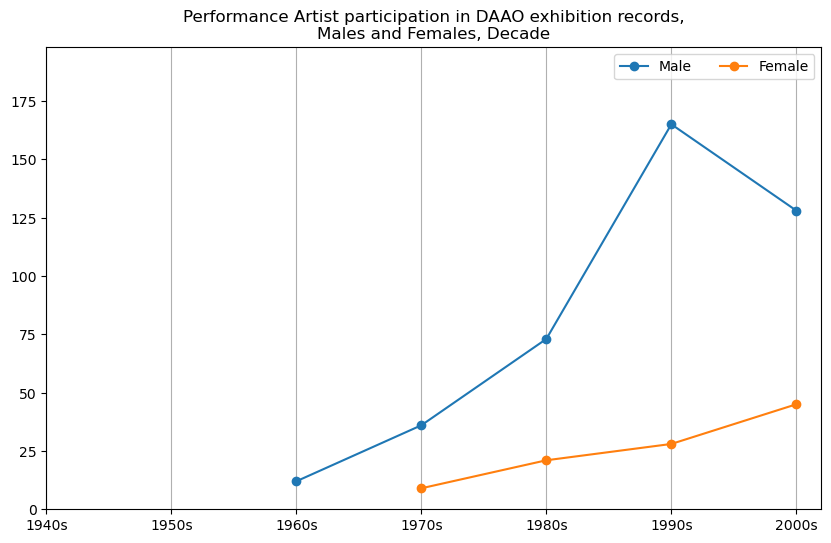

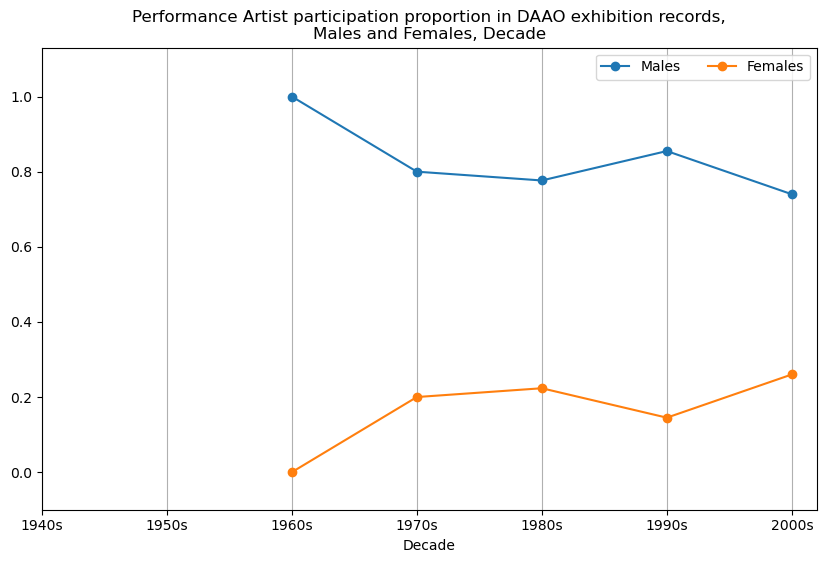

In [21]:
drilldown_by_role(role='Performance Artist', data=gender_roles_time)

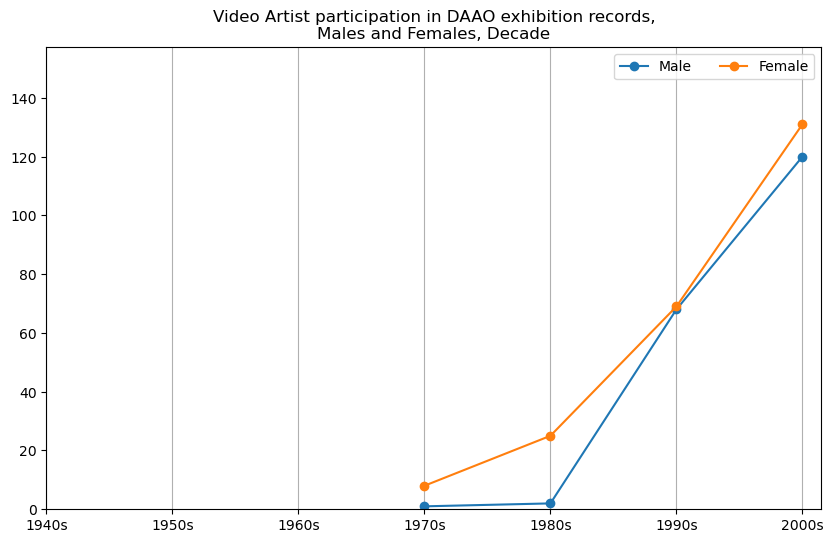

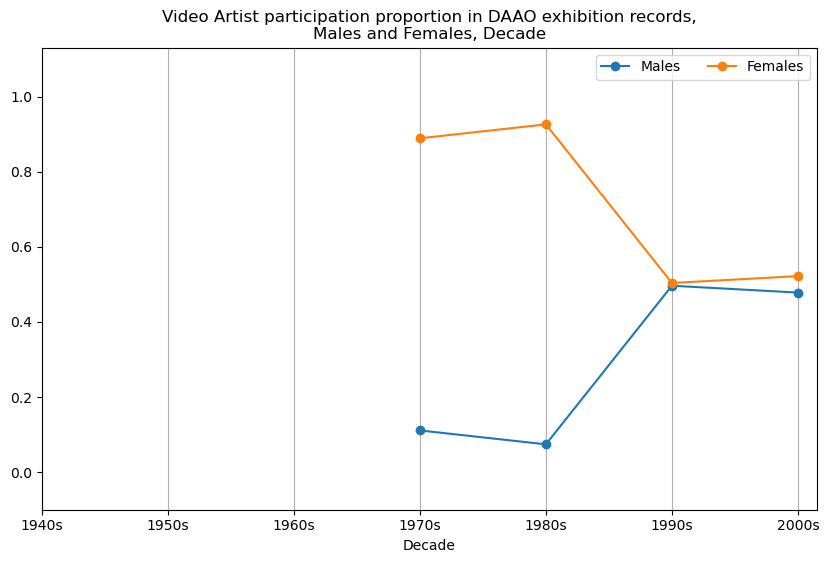

In [22]:
drilldown_by_role(role='Video Artist', data=gender_roles_time)

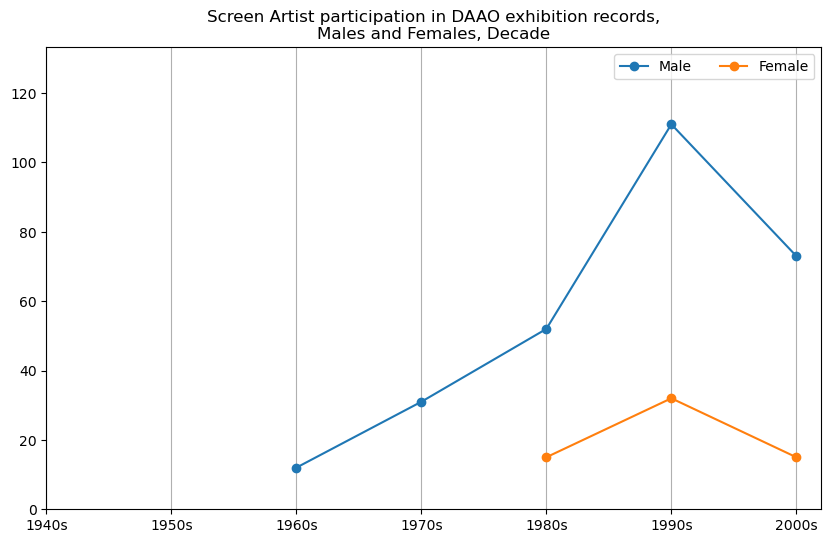

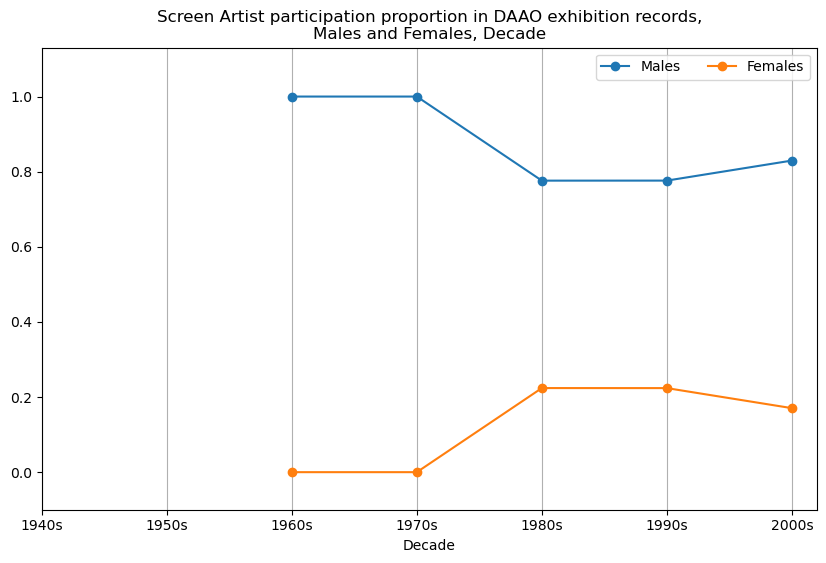

In [23]:
drilldown_by_role(role='Screen Artist', data=gender_roles_time)

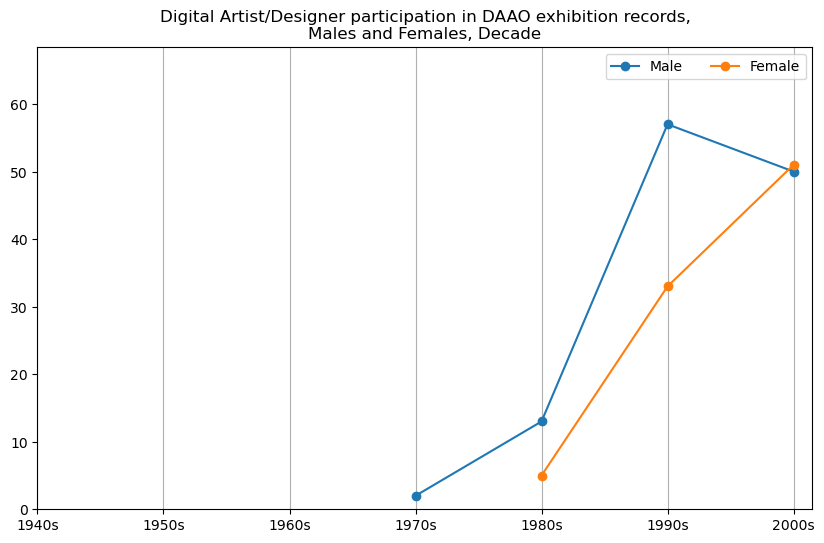

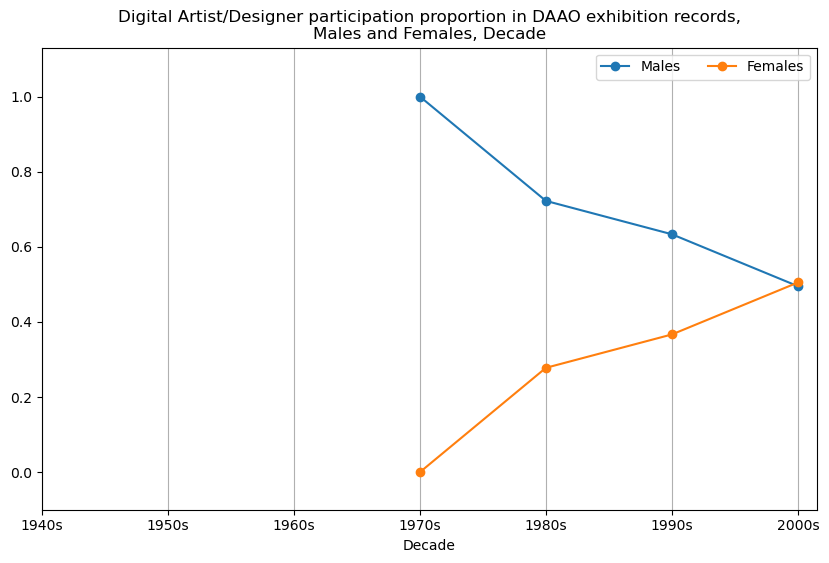

In [24]:
drilldown_by_role(role='Digital Artist/Designer', data=gender_roles_time)

### AusStage Roles

In [29]:
df = pd.read_csv('data/AusStage_biography_level_202209211051.csv')
df = df[df['gender'].isin(['Male','Female'])]
print('AusStage records, Males and Females', df.shape[0])


e_df = pd.read_csv('data/AusStage_event_level_202209211051.csv')
print('AusStage event records', e_df.shape[0])

people_role_event = pd.read_csv('data/people_role_event.csv').iloc[:,1:]
merged = pd.merge(people_role_event.drop('_',axis=1), 
                  df[['original_id','display_name','gender','roles']], 
                  left_on='id', right_on='original_id')

merged['start_year_decade'] = [ int(np.floor(int(year)/25) * 25) 
                            for year in np.array(merged['event_start_year'])]

AusStage records, Males and Females 177602
AusStage event records 124916


#### Actor to Director

How many Females? 80155
How many Females are listed as actors? 44438 (55.44%)
How many Females are listed as directors? 2357 (2.94%)
How many Females are listed as actors & directors? 1455 (1.82%)

How many started as directors? 324 (22.27%)
How many started as actors and progressed into directors? 1131 (77.73%)

How many Males? 92589
How many Males are listed as actors? 46977 (50.74%)
How many Males are listed as directors? 4267 (4.61%)
How many Males are listed as actors & directors? 2782 (3.0%)

How many started as directors? 636 (22.86%)
How many started as actors and progressed into directors? 2146 (77.14%)



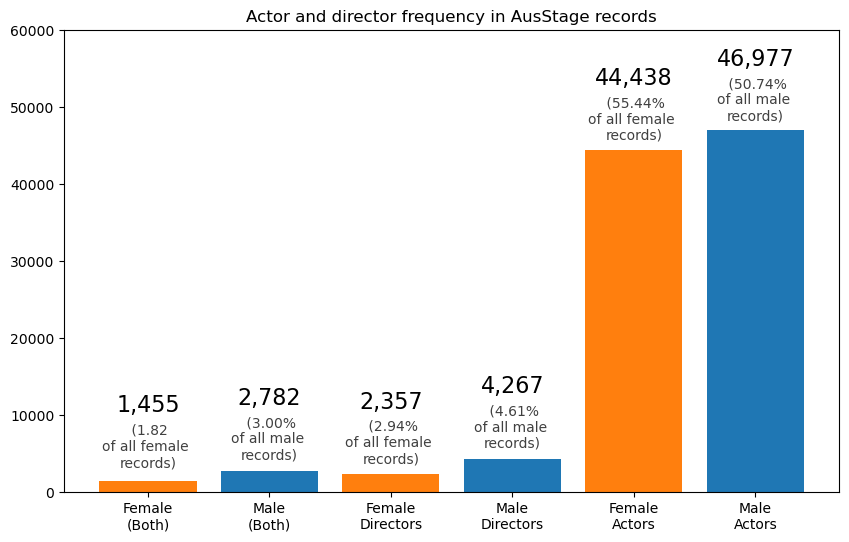

In [35]:
def get_stats(surpassyear=None, gender='Female', printstuff=False):
    females = df[(df['gender'] == gender)]    
    females = females[~females['roles'].isnull()]
    females['director_exists'] = [1 if 'Director ' in r.split('| ') else 0 
                                 for r in females['roles']]

    females_actors = females[(females['roles'].str.contains("Actor", na=False))]
    females_directors = females[females['director_exists'] == 1]
    females_actors_directors = females[(females['roles'].str.contains("Actor", na=False)) & 
                                       (females['director_exists'] == 1)]
    
    if printstuff:
        print(f"How many {gender}s?", females.shape[0])
        print(f"How many {gender}s are listed as actors? {females_actors.shape[0]}",
              f"({round((females_actors.shape[0]/females.shape[0])*100,2)}%)")
        print(f"How many {gender}s are listed as directors? {females_directors.shape[0]}",
              f"({round((females_directors.shape[0]/females.shape[0])*100,2)}%)")
        print(f"How many {gender}s are listed as actors & directors? {females_actors_directors.shape[0]}",
              f"({round((females_actors_directors.shape[0]/females.shape[0])*100,2)}%)")

    relevant_roles = merged[merged.role.str.contains(r"Actor|Director")]
    # other_roles = []
    # director_roles = ['Assistant to the Director','Assistant Director','Associate Director']

    relevant_females = dict()
    for female_id in females_actors_directors.original_id.unique():
        this_female = relevant_roles[(relevant_roles['id'] == female_id)]\
                        .sort_values('event_start_year')
        
        if surpassyear is not None:
            if this_female.iloc[0]['start_year_decade'] != surpassyear: continue
        
        first_actor_role = this_female[this_female.role.str.contains('Actor')]['event_start_year']\
                                    .iloc[0]

        try:
            first_director_role = this_female[this_female.role=='Director']['event_start_year']\
                                        .iloc[0]
        except:
    #         this_roles = list(this_female['role'].unique())
    #         other_roles.extend(this_roles)
            continue

        no_events = this_female[(this_female['event_start_year'] > first_actor_role) & 
                                (this_female['event_start_year'] < first_director_role)]

        relevant_females[female_id] = [first_actor_role,first_director_role,
                                       no_events.shape[0]]
    if printstuff is False:
        if len(relevant_females) == 0: return [surpassyear,None,None,None]
    
    relevant_females_df = pd.DataFrame(relevant_females).T
    relevant_females_df.columns = ['Actor_Yr','Director_Yr','NoEvents']
    relevant_females_df['ActorDirectorYrDiff'] = relevant_females_df['Director_Yr'] - relevant_females_df['Actor_Yr']

    directors_first = relevant_females_df[relevant_females_df['ActorDirectorYrDiff'] <= 0]
    actors_first = relevant_females_df[relevant_females_df['ActorDirectorYrDiff'] > 0]

    if printstuff:
        print(f'\nHow many started as directors? {directors_first.shape[0]}',
              f'({round((directors_first.shape[0]/relevant_females_df.shape[0])*100,2)}%)')

        print(f'How many started as actors and progressed into directors? {actors_first.shape[0]}',
              f'({round((actors_first.shape[0]/relevant_females_df.shape[0])*100,2)}%)\n')

    actors_first_clean = actors_first[actors_first['ActorDirectorYrDiff'] <= 80]
    actors_first_clean['NoEvents'] += 1
    return [surpassyear,
            actors_first_clean.shape[0],
            actors_first_clean['NoEvents'].median(),
            actors_first_clean['ActorDirectorYrDiff'].median()]
    # print(actors_first_clean.describe().T.tail(2))

_ = get_stats(printstuff=True)
_ = get_stats(printstuff=True, gender='Male')

# Data to plot
x = ['Female\n(Both)',
     'Male\n(Both)',
     'Female\nDirectors',
     'Male\nDirectors',
     'Female\nActors',
     'Male\nActors']

heights = [1455, 2782, 2357, 4267, 44438, 46977]

fig, ax = plt.subplots(figsize=(10, 6))

# Create the bar chart
plt.bar(x, heights, color='tab:orange')
plt.ylim(0,60000)
# plt.yticks([])

# Create the bar chart
plt.bar(x[1], heights[1], color='tab:blue')
plt.bar(x[3], heights[3], color='tab:blue')
plt.bar(x[5], heights[5], color='tab:blue')

plt.text(0, 9500, '1,455\n', 
         ha='center', va='center',size=16)
plt.text(0, 8000, '\n\n (1.82\nof all female \nrecords)', 
         ha='center', va='center',size=10, alpha=0.75)

plt.text(1, 10500, '2,782\n', 
         ha='center', va='center',size=16)
plt.text(1, 9000, '\n\n (3.00%\nof all male \nrecords)', 
         ha='center', va='center',size=10, alpha=0.75)

plt.text(2, 10000, '2,357\n', 
         ha='center', va='center',size=16)
plt.text(2, 8500, '\n\n (2.94%\nof all female \nrecords)', 
         ha='center', va='center',size=10, alpha=0.75)
         
plt.text(3, 12000, '4,267\n', 
         ha='center', va='center',size=16)
plt.text(3, 10500, '\n\n (4.61%\nof all male \nrecords)', 
         ha='center', va='center',size=10, alpha=0.75)

plt.text(4, 52000, '44,438\n', 
         ha='center', va='center',size=16)
plt.text(4, 50500, '\n\n (55.44%\nof all female \nrecords)', 
         ha='center', va='center',size=10, alpha=0.75)
         
plt.text(5, 54500, '46,977\n', 
         ha='center', va='center',size=16)
plt.text(5, 53000, '\n\n (50.74%\nof all male \nrecords)', 
         ha='center', va='center',size=10, alpha=0.75)


plt.title('Actor and director frequency in AusStage records')

# Show the plot
plt.show()

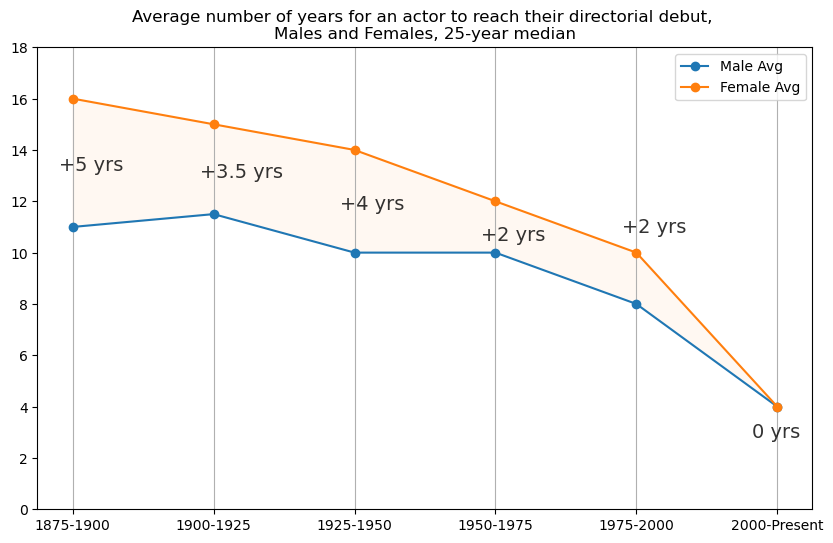

In [34]:
decades = list(merged['start_year_decade'].unique())
decades.sort()

female_medians = []
male_medians = []

for x in decades:
    female_medians.append(get_stats(surpassyear = x))
    male_medians.append(get_stats(surpassyear = x, gender='Male'))

avg_progression_time = pd.merge((pd.DataFrame(male_medians)).iloc[:,[0,3]], 
                                (pd.DataFrame(female_medians)).iloc[:,[0,3]],
                                on=0).tail(-4)
avg_progression_time.columns = ['Year','Males','Females']

# gender frequency over decade
fig, ax = plt.subplots(figsize=(10, 6))

plt.plot(avg_progression_time['Year'], 
         avg_progression_time['Males'], 
         label="Male Avg", marker='o')

plt.plot(avg_progression_time['Year'], 
         avg_progression_time['Females'], 
         label="Female Avg", marker='o')

plt.fill_between(avg_progression_time['Year'], 
                 avg_progression_time['Males'],
                 avg_progression_time['Females'],
                 color='tab:orange',alpha=.05)

plt.text(1872.5, 13.4, '+5 yrs', ha='left', va='center',size=14, alpha = 0.8)
plt.text(1897.5, 13.15, '+3.5 yrs', ha='left', va='center',size=14, alpha = 0.8)
plt.text(1922.5, 11.9, '+4 yrs', ha='left', va='center',size=14, alpha = 0.8)
plt.text(1947.5, 10.7, '+2 yrs', ha='left', va='center',size=14, alpha = 0.8)
plt.text(1972.5, 11, '+2 yrs', ha='left', va='center',size=14, alpha = 0.8)
plt.text(1995.5, 3, '0 yrs', ha='left', va='center',size=14, alpha = 0.8)

plt.grid(axis='x')
plt.xticks(range(1875, 2010, 25), range(1875, 2010, 25))
plt.ylim(1875,2010)
plt.xticks(range(1875, 2010, 25), 
           ['1875-1900', '1900-1925', '1925-1950',
            '1950-1975', '1975-2000', '2000-Present'])
plt.ylim(0,18)
ax.legend().set_visible(True)

plt.title('Average number of years for an actor to reach their directorial debut, \nMales and Females, 25-year median', 
          size=12)

plt.show()

### Exhibitions, Spatial Analysis

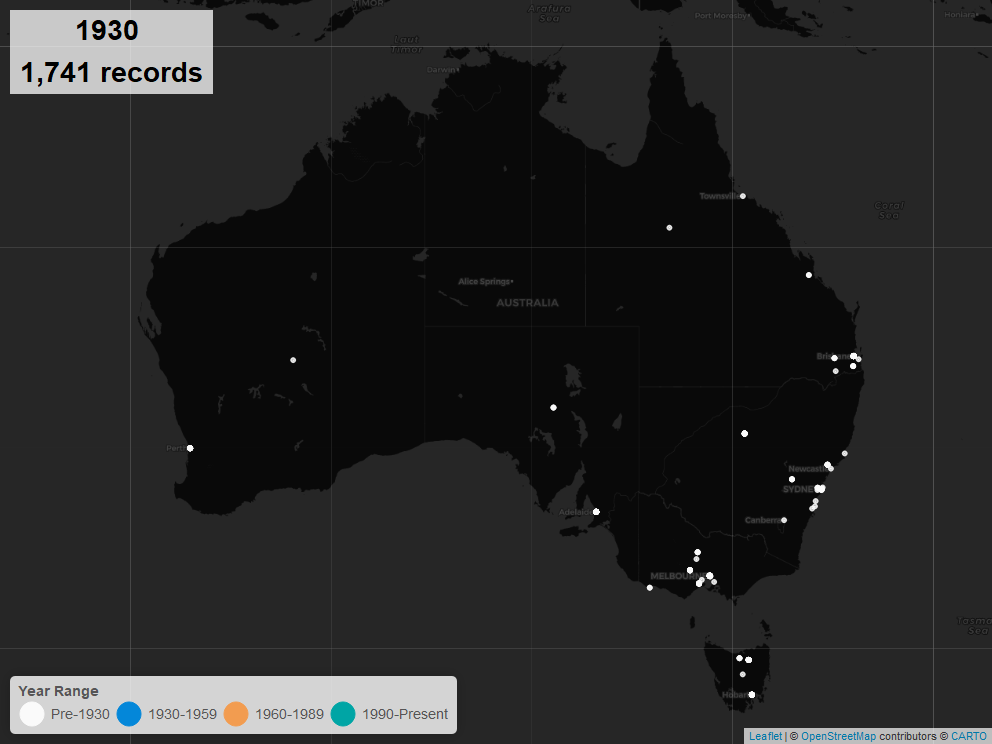

In [4]:
Image(filename='images/map_1930_colour.png')

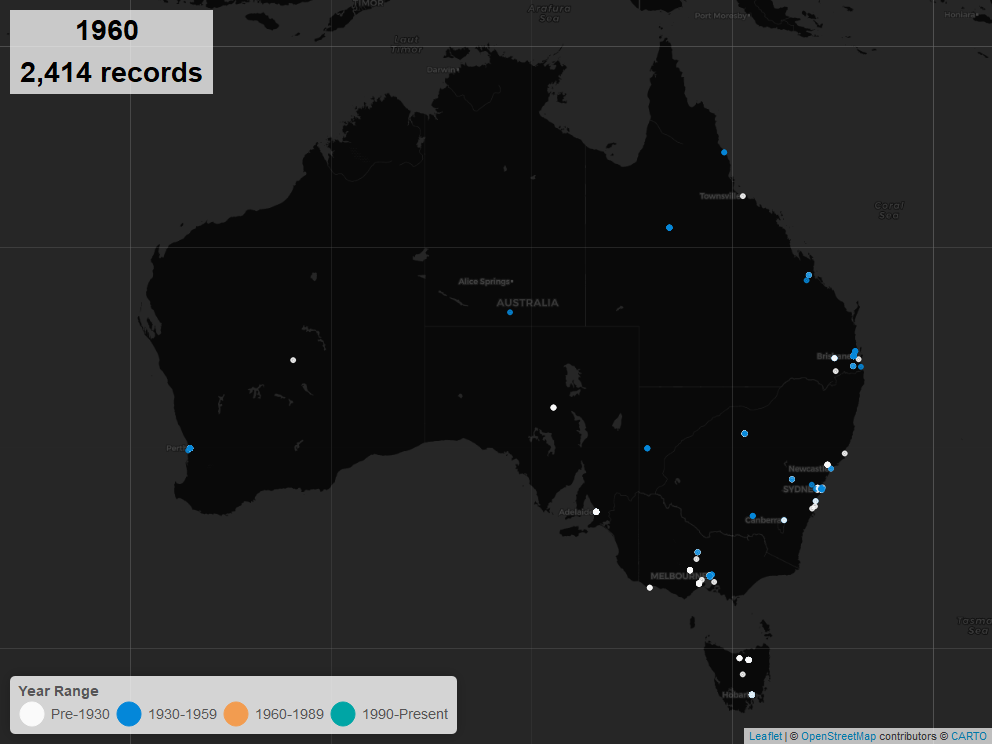

In [5]:
Image(filename='images/map_1960_colour.png')

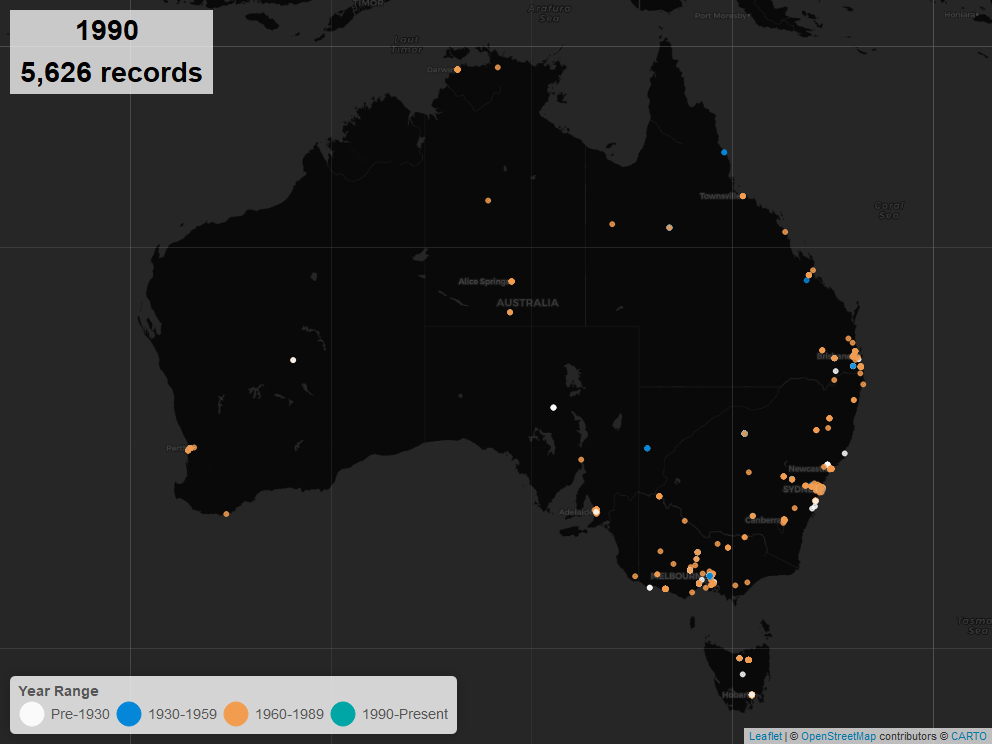

In [6]:
Image(filename='images/map_1990_colour.png')

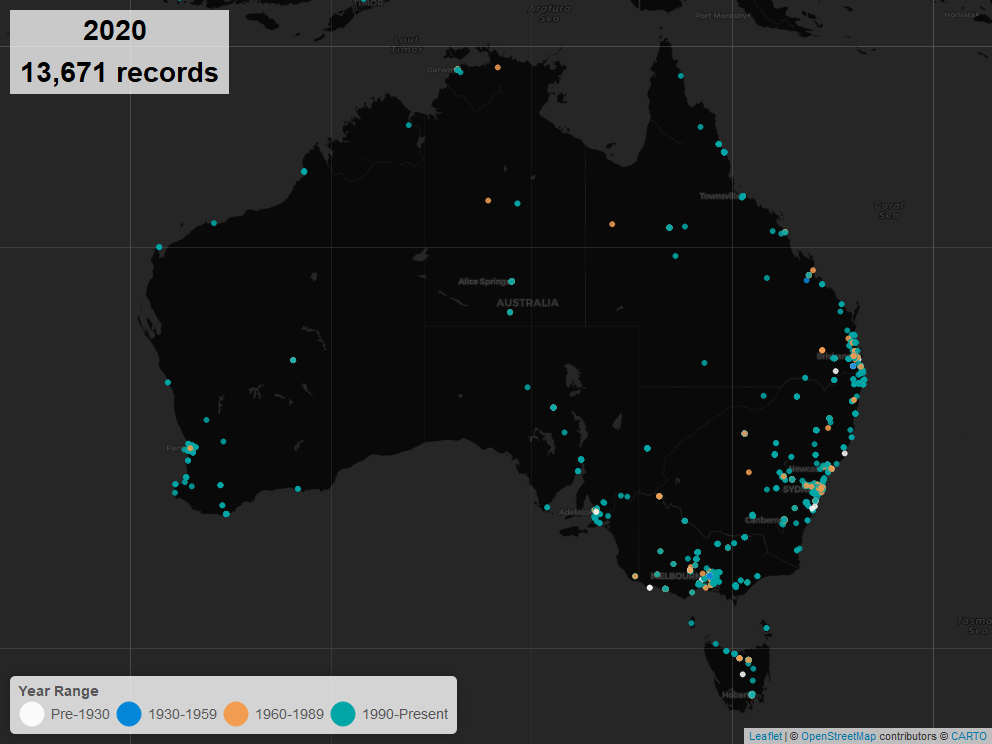

In [7]:
Image(filename='images/map_2020_colour.png')

Compare with other datasets with [interactive map](https://jmunoz.shinyapps.io/ACDE_Map/).